# Severely Redshift-Underestimated, Unreddened Galaxies
## Do these galaxies have any physical similarities? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

In [2]:
sns.set(style='whitegrid', context='talk', palette='viridis', rc={'figure.figsize':(14,10)})
plt.rcParams['figure.dpi'] = 300

In [3]:
 fig_prefix = 'u_band_bad_z/07-09-20-'

In [4]:
bbands = ['ind', 'LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'VIS', 'NISP_Y', 'NISP_J', 'NISP_H']

In [5]:
model_df = pd.read_csv('subset_4051.csv', index_col=0, header=0)
observed_mags_df = pd.read_csv('ugrizVISYJH4051.cat', delimiter='\s+', index_col=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], names=bbands)

model_df.head()

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
925475   5.36   0.01  0.9128  27.2677  25.8091  25.3337  24.9579  32.8884   
86139    1.96   0.80  0.6776  29.6252  27.8035  26.5675  25.6417  32.2674   
340793   0.26   7.00  0.5464  27.9727  24.7910  23.4551  22.3137  37.2184   
967092   0.83   0.10  0.7879  19.7992  19.8492  19.8144  19.5259  19.5824   
1447538  3.30   0.06  0.8168  38.7796  35.4560  33.7999  31.5068  51.5970   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
925475   31.2726  28.3088  ...   24.6984    24.7020  1.000000e+10  0.3  1.0   
86139    30.9611  30.0527  ...   24.9591    24.9713  1.000000e+10  0.0  1.0   
340793   32.9626  29.7347  ...   21.5998    21.6078  1.000000e+10  0.0  1.0   
967092   19.7150  19.8901  ...   19.4702    19.4699  1.000000e+10  0.3  1.0   
1447538  43.8688  40.4406  ...   30.0605    30.0766  1.000000e+10  0.3  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
925475       0.1     1.0  0.8  12.700636      True  
86139        3.0     1.0  1.0  10.427619      True  
340793       1.0     1.0  1.6   3.126385      True  
967092       1.0     0.0  0.0   7.158495      True  
1447538      3.0     1.0  1.6  11.846391      True  

[5 rows x 48 columns]

In [6]:
observed_mags_df['foreign_index'] = model_df.index

In [7]:
observed_mags_df['spec_z'] = model_df['z'].values

### Importing both the full coverage results and the sans u-band results for comparison (mostly visually, to identify which galaxies to select for further investigation)

In [8]:
all_zphot = np.loadtxt(r'/home/chris/Documents/ZPHOT1.3/src/result_all_4051/result_ugrizVISYJH_4051.z_phot')

In [9]:
grizVISYJH_zphot = np.loadtxt(r'/home/chris/Documents/ZPHOT1.3/src/result_grizVISYJH_4051/result_grizVISYJH_4051.z_phot')

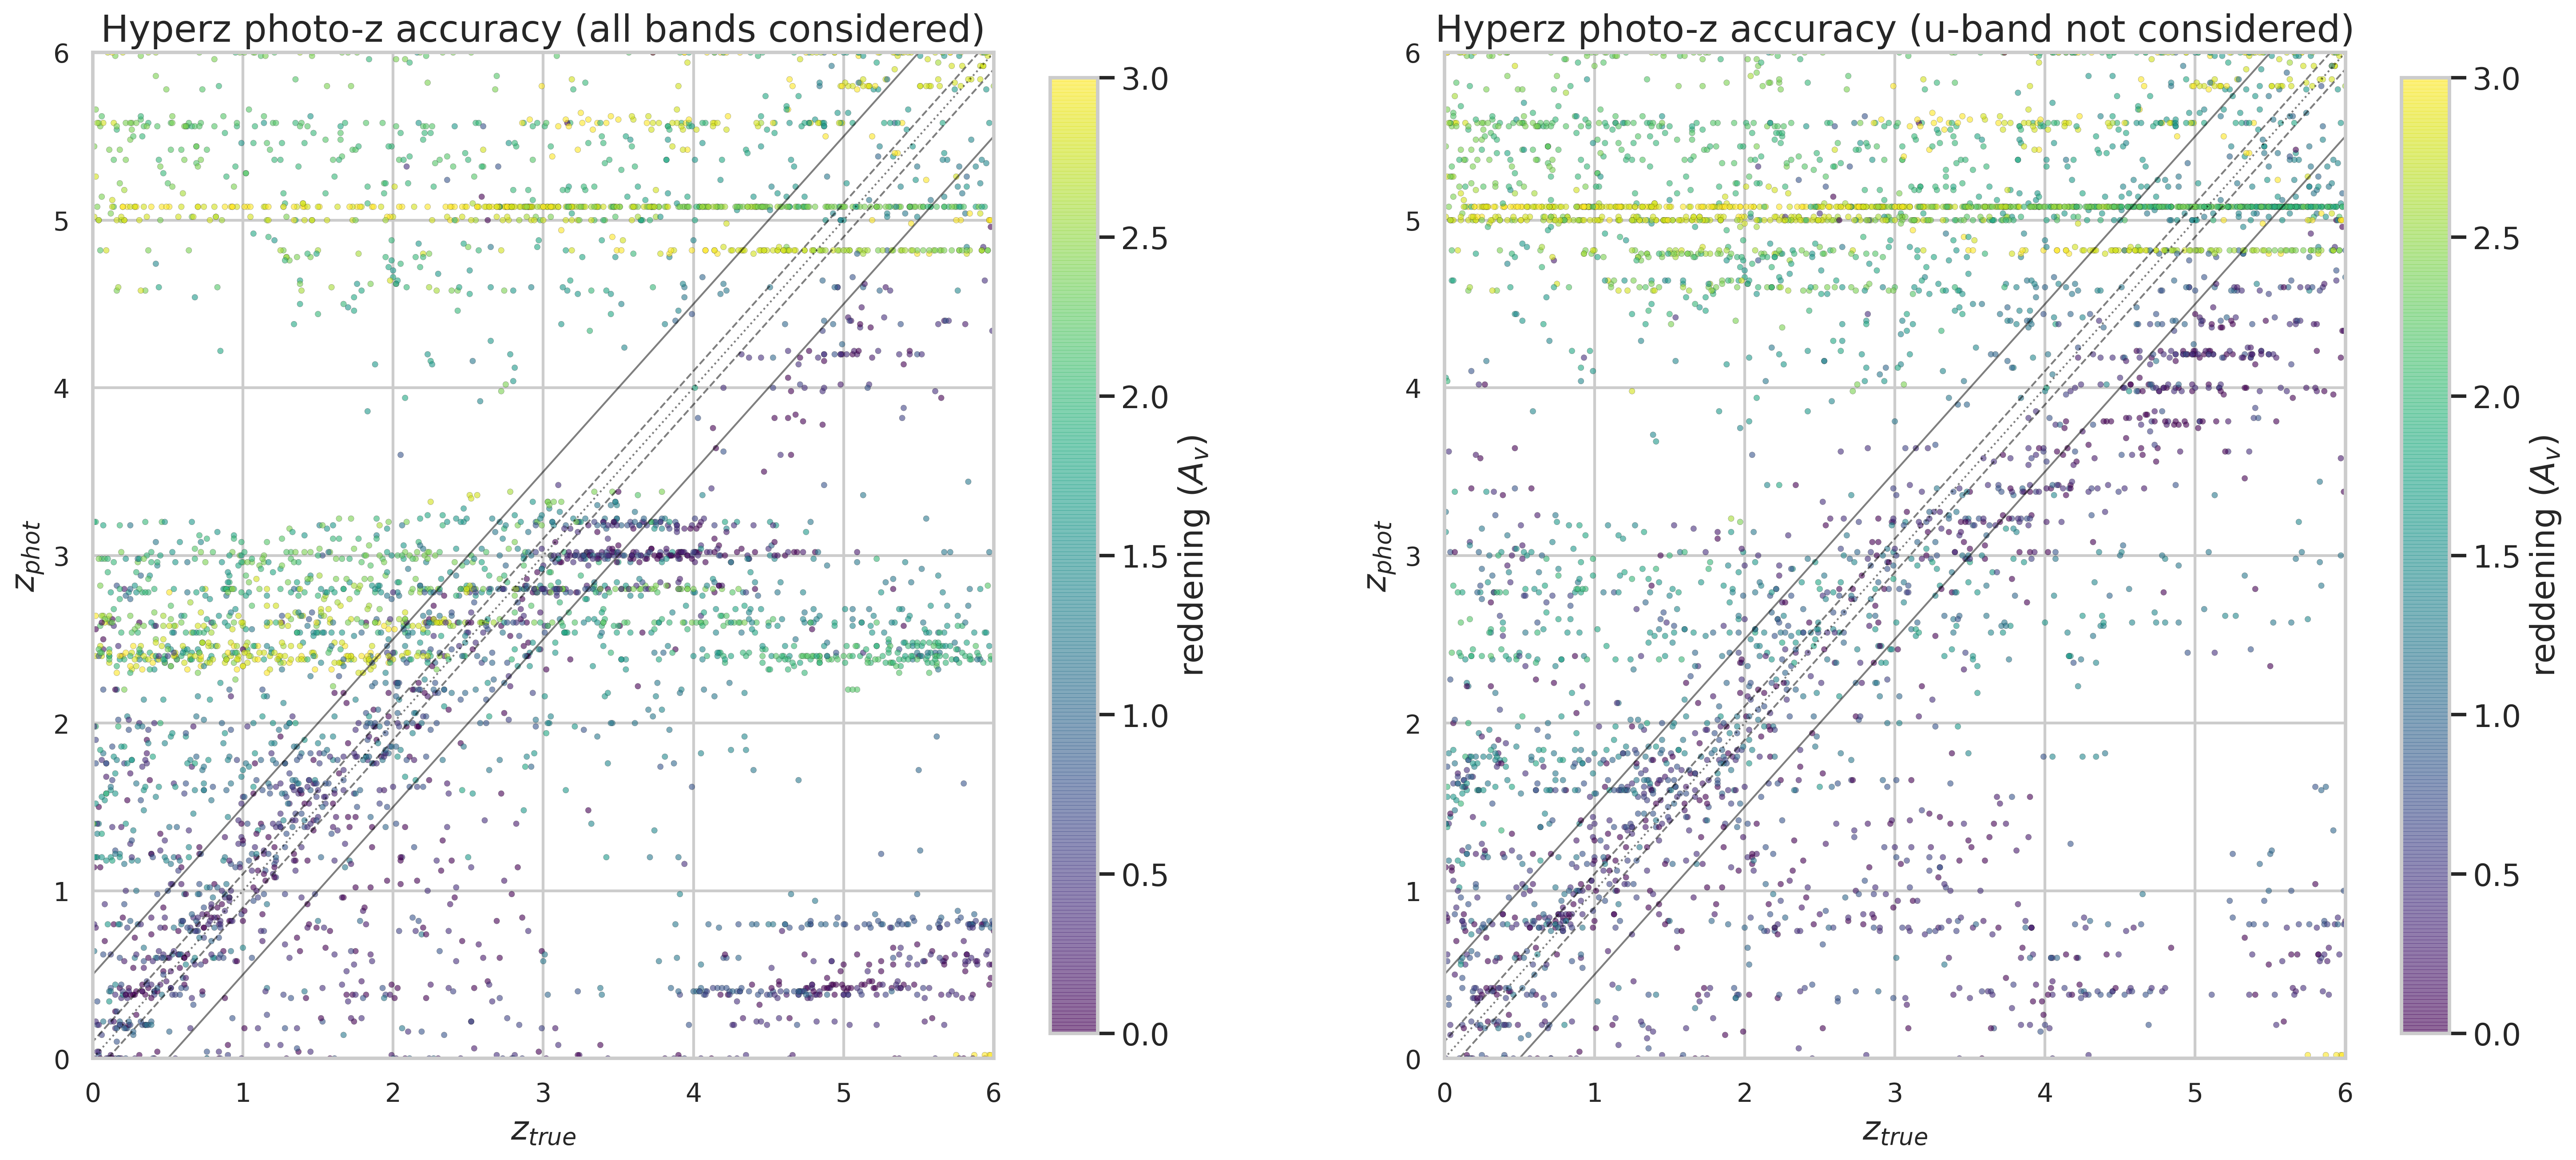

In [10]:
plt.figure(figsize=(24,10))

plt.subplot(121)
plt.title('Hyperz photo-z accuracy (all bands considered)', fontsize=20)
plt.plot([-6., 9.5], [-5.5, 10.],'k', alpha=0.5, lw=1)
plt.plot([-6., 9.9], [-5.9, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.], [-6, 10.], ':k', alpha=0.5, ls=':', lw=1)
plt.plot([-6., 10.1], [-6.1, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.5], [-6.5, 10.],'k', alpha=0.5, lw=1)

plt.scatter(observed_mags_df['spec_z'], all_zphot[:, 1], s=10, alpha=0.6, c=model_df['Av'], cmap='viridis', edgecolors='k', lw=0.1)
cbar = plt.colorbar(shrink=0.95)
cbar.set_label(r'reddening ($A_v$)')
plt.ylabel((r'$z_{phot}$'))
plt.xlabel((r'$z_{true}$'))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 6)
plt.xlim(0, 6)

plt.subplot(122)
plt.title('Hyperz photo-z accuracy (u-band not considered)', fontsize=20)

plt.plot([-6., 9.5], [-5.5, 10.],'k', alpha=0.5, lw=1)
plt.plot([-6., 9.9], [-5.9, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.], [-6, 10.], ':k', alpha=0.5, ls=':', lw=1)
plt.plot([-6., 10.1], [-6.1, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.5], [-6.5, 10.],'k', alpha=0.5, lw=1)

plt.scatter(observed_mags_df['spec_z'], grizVISYJH_zphot[:, 1], s=10, alpha=0.6, c=model_df['Av'], cmap='viridis', edgecolors='k', lw=0.1)
cbar = plt.colorbar(shrink=0.95)
cbar.set_label(r'reddening ($A_v$)')
plt.ylabel((r'$z_{phot}$'))
plt.xlabel((r'$z_{true}$'))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 6)
plt.xlim(0, 6)

#plt.savefig(fig_prefix + 'side-by-side-photoz.png', dpi=300, transparent=False, format='png')
plt.show()

### Query to identify this specific set of objects

In [11]:
observed_mags_df['allphot_z'] = all_zphot[:,1]

In [12]:
bad_z_index = observed_mags_df[(observed_mags_df['spec_z']>3.5) & (observed_mags_df['allphot_z']<1.3)].index

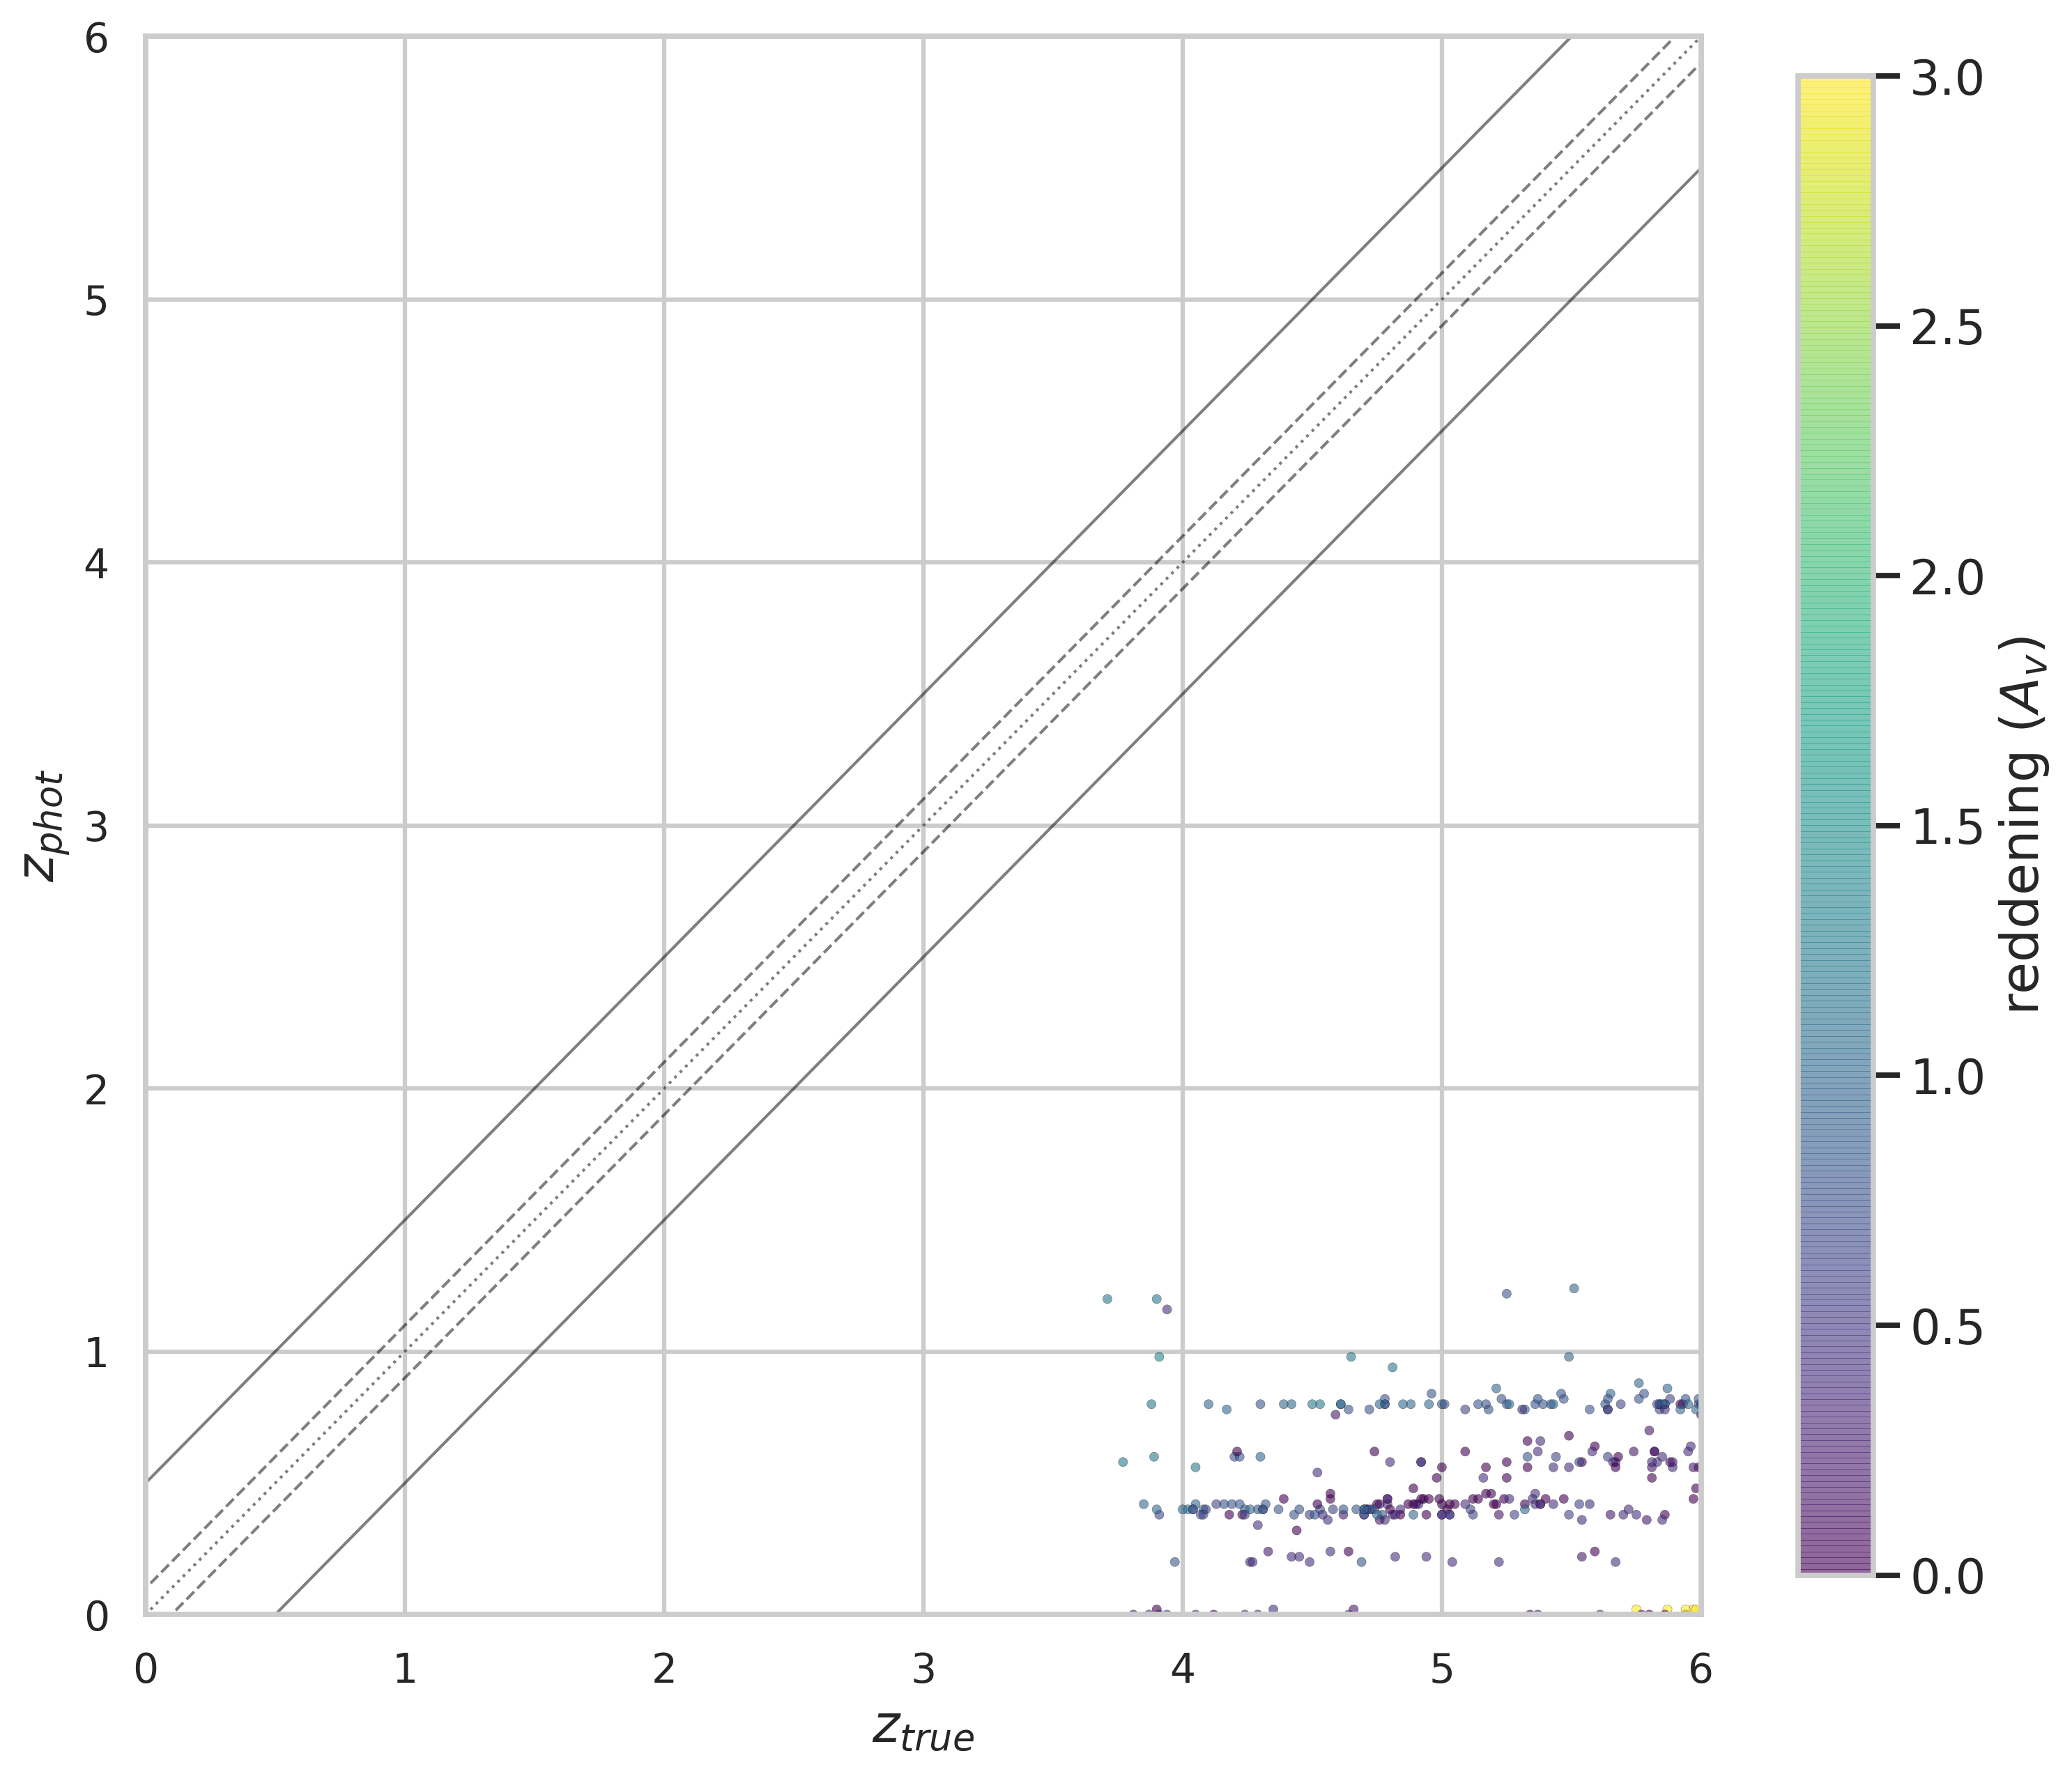

In [13]:
plt.figure(figsize=(12, 10))
plt.plot([-6., 9.5], [-5.5, 10.],'k', alpha=0.5, lw=1)
plt.plot([-6., 9.9], [-5.9, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.], [-6, 10.], ':k', alpha=0.5, ls=':', lw=1)
plt.plot([-6., 10.1], [-6.1, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.5], [-6.5, 10.],'k', alpha=0.5, lw=1)

plt.scatter(observed_mags_df.loc[bad_z_index, 'spec_z'].values,
            observed_mags_df.loc[bad_z_index, 'allphot_z'].values, 
            s=10, alpha=0.6,
            c=model_df.loc[observed_mags_df.loc[bad_z_index, 'foreign_index'], 'Av'].values,
            cmap='viridis', edgecolors='k', lw=0.1)
cbar = plt.colorbar(shrink=0.95)
cbar.set_label(r'reddening ($A_v$)')
plt.ylabel((r'$z_{phot}$'))
plt.xlabel((r'$z_{true}$'))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

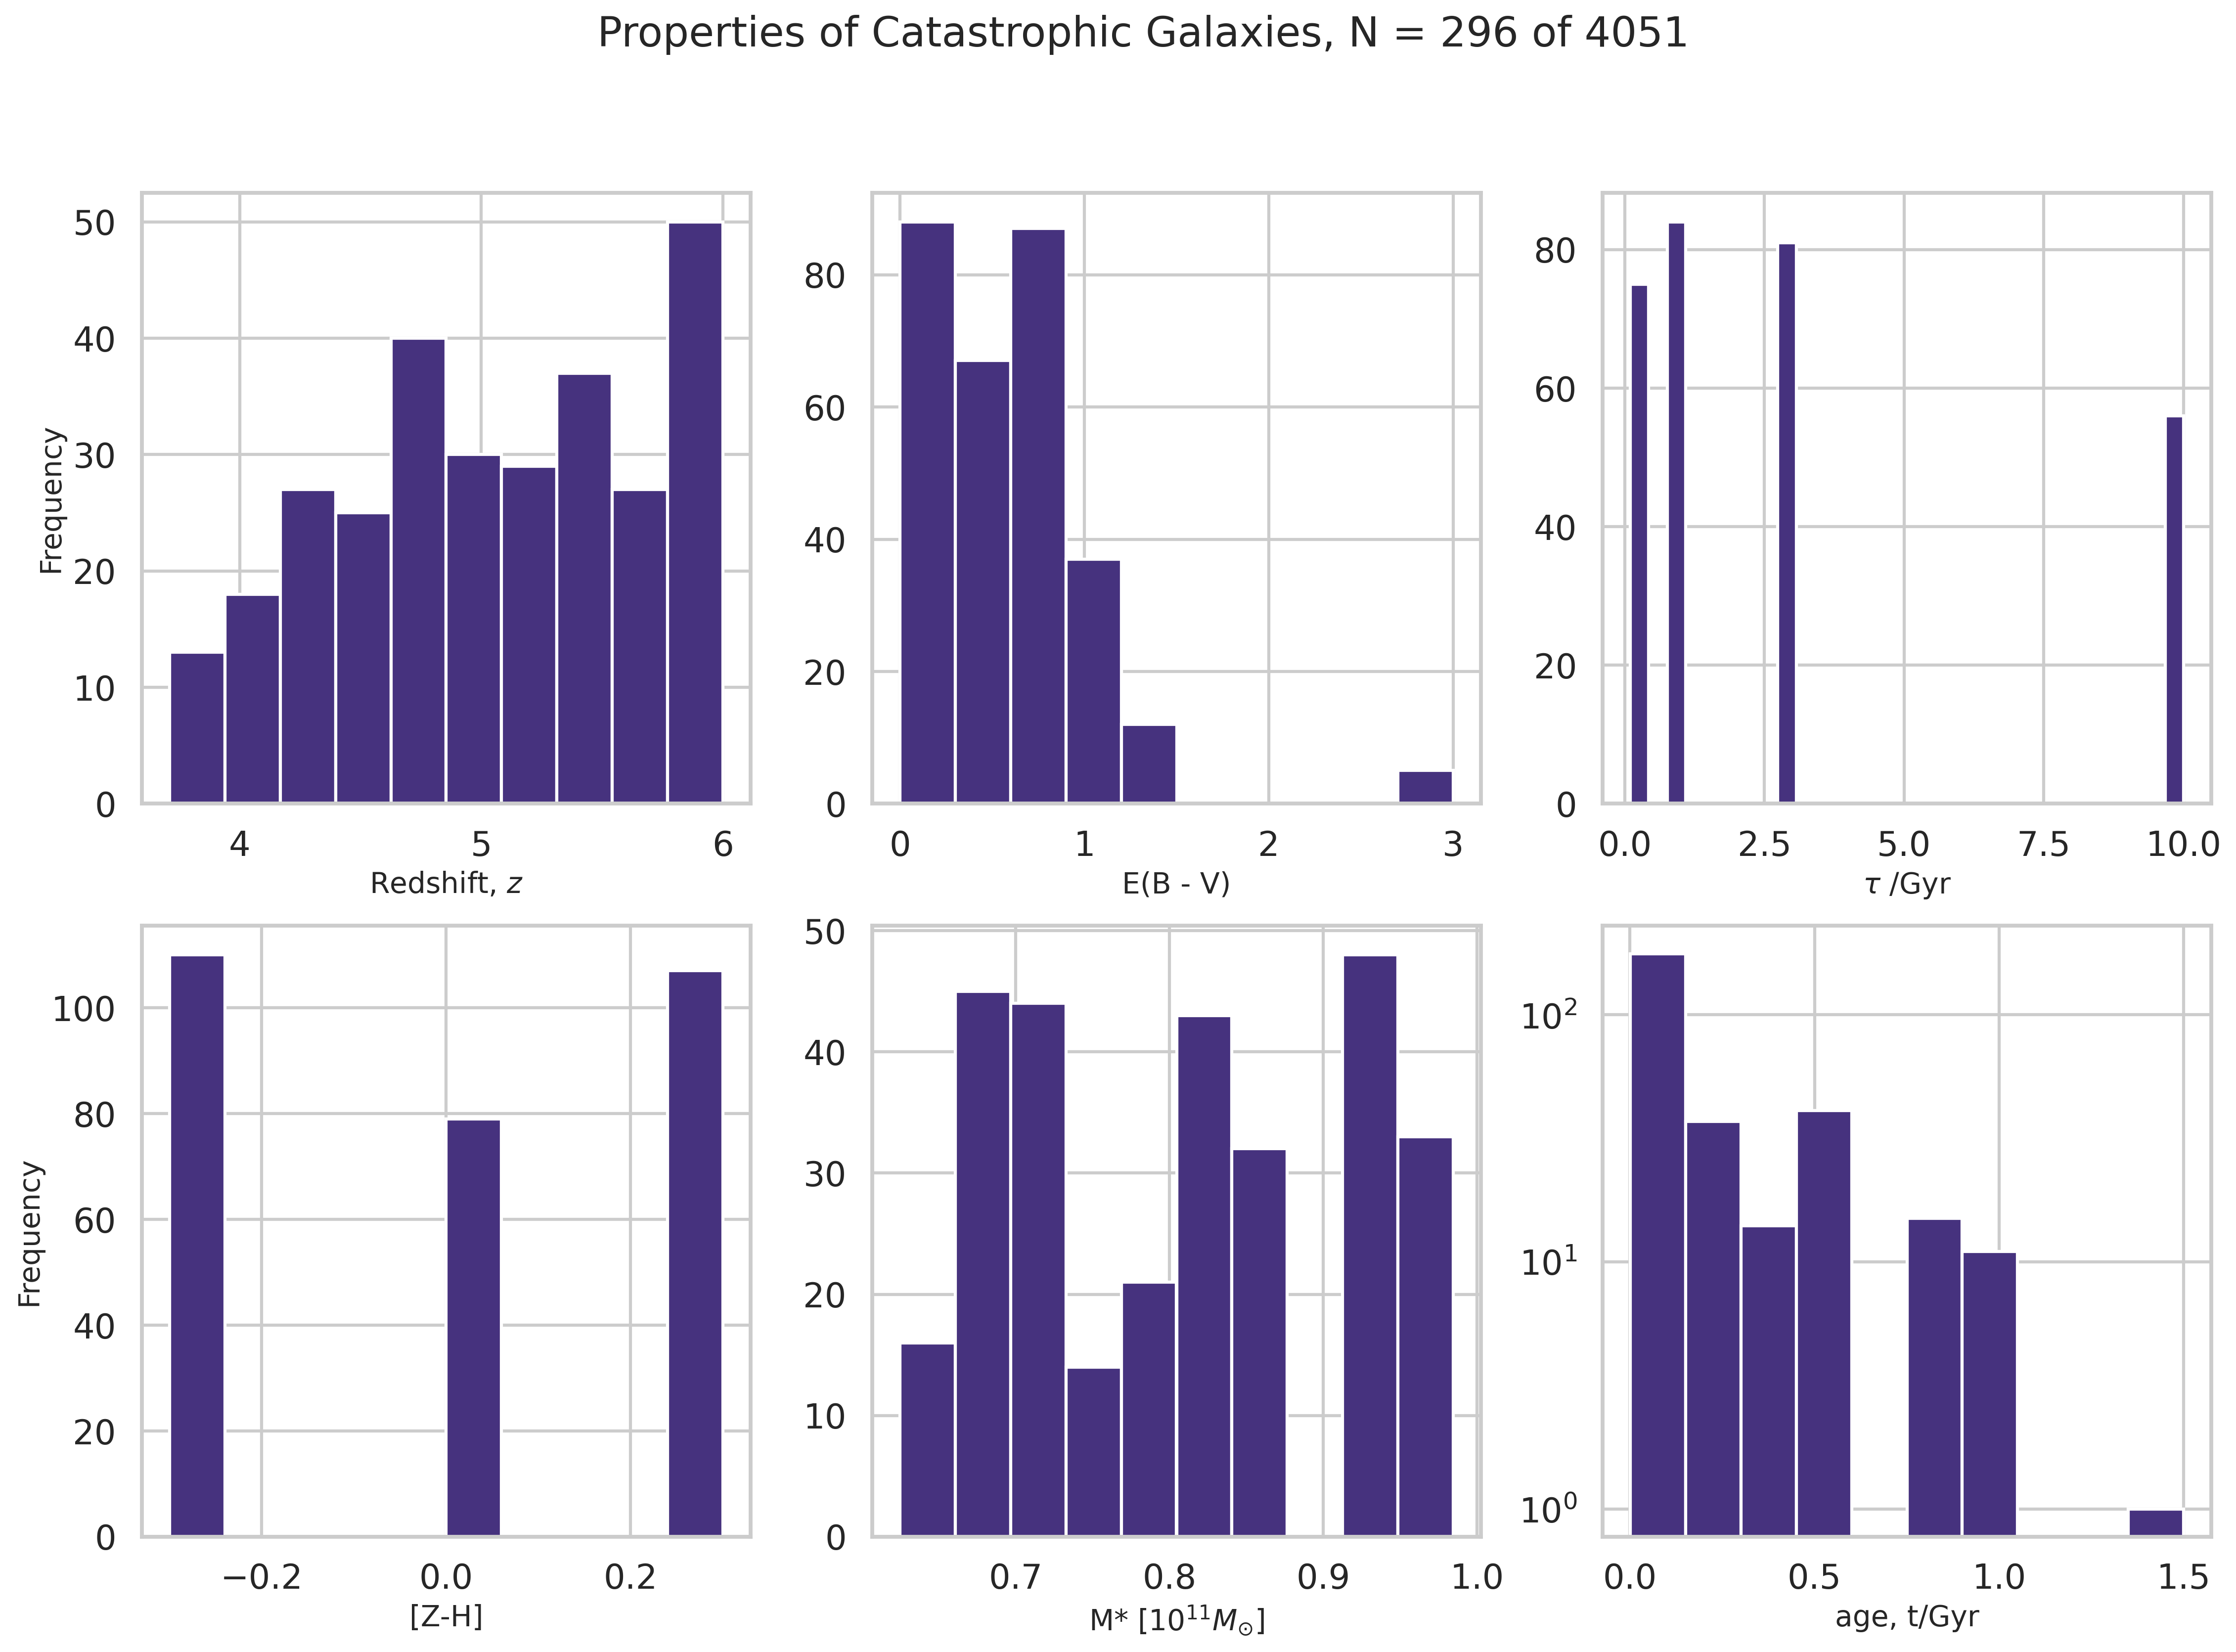

In [14]:
gal_params = ('z', 'Av', 'tau/Gyr', 'Z', 'M*', 't/Gyr')
units_params = (r'Redshift, $z$', 'E(B - V)',
                r'$\tau$ /Gyr', '[Z-H]',
                r'M* [$10^{11} M_{\odot}$]', 'age, t/Gyr')

plt.figure(figsize=(18, 12))
plt.suptitle('Properties of Catastrophic Galaxies, N = %i of 4051' % len(bad_z_index),
             fontsize=20)

for i in range(0, 6):   
    if i == 5 : log = True
    else : log = False    
    
    if i == 2 : bins = 30
    else : bins = None
    
    plt.subplot(231+i)
    
    if i == 0 or i == 3 : plt.ylabel('Frequency', fontsize=14)
    plt.xlabel(units_params[i], fontsize=14)

    plt.hist(model_df.loc[observed_mags_df.loc[bad_z_index, 'foreign_index'].values, gal_params[i]], log=log, bins=bins)
#plt.savefig( fig_prefix + 'bad_object_data_summary.png', dpi=300, transparent=False, format='png')

Amazing! We see that - as predicted - the galaxies which have their ages underestimated ARE in fact younger populations at high-redshift (can they actually be any older at this time due to $t_0$?). This would place them in an era of high-SFR and therefore highly actve in the ultraviolet wavelengths from an observational-frame. Additionally, only those objects whose light is preserved by low dust-emission become problematic. 

Let's take a look at which spectral type these are all given, their probability, their second solution, their assigned age, assigned Av, and make the plot in Maraston (2006) figure 4.

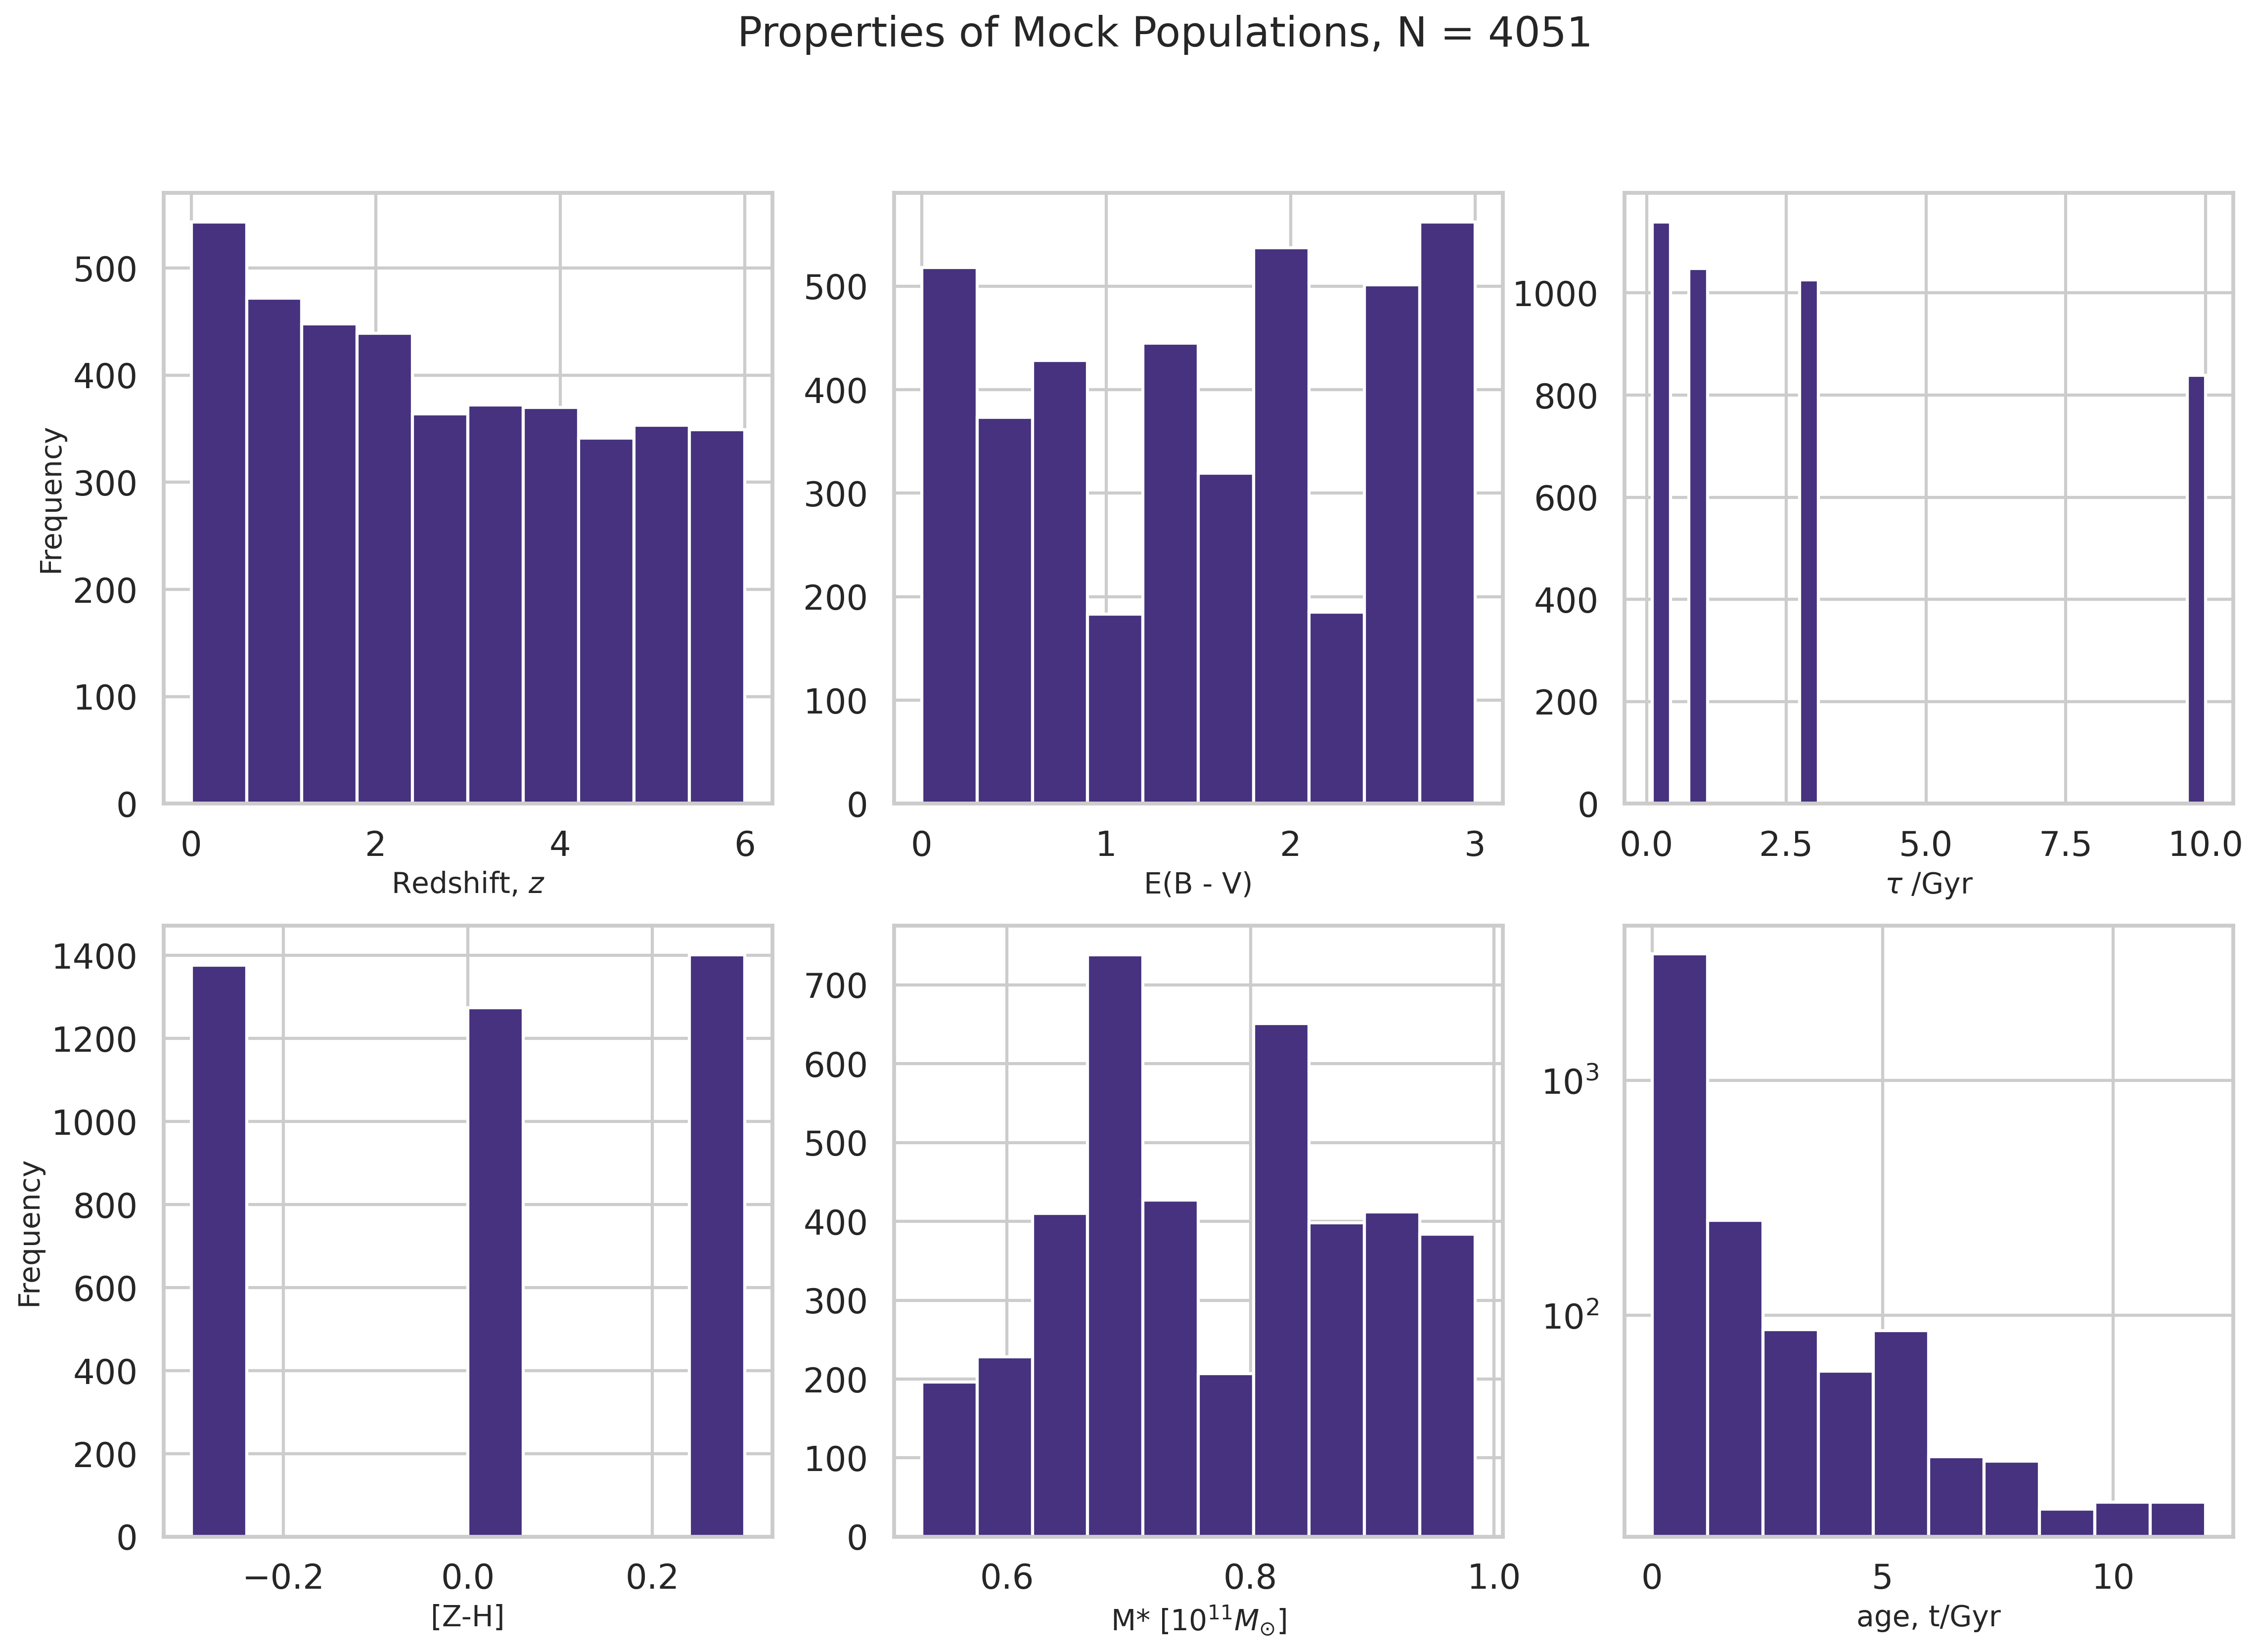

In [144]:
gal_params = ('z', 'Av', 'tau/Gyr', 'Z', 'M*', 't/Gyr')
units_params = (r'Redshift, $z$', 'E(B - V)',
                r'$\tau$ /Gyr', '[Z-H]',
                r'M* [$10^{11} M_{\odot}$]', 'age, t/Gyr')

plt.figure(figsize=(18, 12))
plt.suptitle('Properties of Mock Populations, N = %i' % len(model_df),
             fontsize=20)

for i in range(0, 6):   
    if i == 5 : log = True
    else : log = False    
    
    if i == 2 : bins = 30
    else : bins = None
    
    plt.subplot(231+i)
    
    if i == 0 or i == 3 : plt.ylabel('Frequency', fontsize=14)
    plt.xlabel(units_params[i], fontsize=14)

    plt.hist(model_df[gal_params[i]], log=log, bins=bins)
#plt.savefig(fig_prefix + 'all_data_summary.png', dpi=300, transparent=False, format='png')

### This is the output file of hyperz - Version 1.3  
#### Date: Wed Jul  1 09:39:43 2020
### Photometric catalogue : 
  `ugrizVISYJH4051.cat`
### Templates SEDs:
`   1  templatessalp/new_mar05_tau01.Z002.salp.ised  BC
   2  templatessalp/new_mar05_tau01.Z004.salp.ised  BC
   3  templatessalp/new_mar05_tau01.Z001.salp.ised  BC
   4  templatessalp/new_mar05_tau1.Z004.salp.ised  BC
   5  templatessalp/new_mar05_tau1.Z002.salp.ised  BC
   6  templatessalp/new_mar05_tau1.Z001.salp.ised  BC
   7  templatessalp/new_mar05_tau3.Z002.salp.ised  BC
   8  templatessalp/new_mar05_tau10.Z002.salp.ised  BC
   9  templatessalp/new_mar05_tau10.Z004.salp.ised  BC
  10  templatessalp/new_mar05_tau10.Z001.salp.ised  BC
  11  templatessalp/new_mar05_ssp.Z002.salp.ised  BC`
### Characteristics of filters
`   n     wl_eff     surface   bandpass1  conv_AB  m_corr mlim(Vega) nd
    1    3678.791    483.497    400.386    0.656  0.000  22.744     0
    2    4838.533   1153.805    965.102   -0.072  0.000  23.052     0
    3    6440.406   1387.511    896.239    0.195  0.000  22.805     0
    4    7819.968   1384.167    913.051    0.419  0.000  21.841     0
    5    9168.834   1272.171    940.504    0.535  0.000  21.525     0
    6    7155.421   3290.675   2086.095    0.255  0.000  20.345     0
    7   10866.631   2533.358   1580.391    0.701  0.000  19.099     0
    8   13686.279   3912.296   2351.518    1.051  0.000  17.449     0
    9   17726.499   4897.392   2905.883    1.496  0.000  16.004     0`
    
  `  zmin      zmax     zstep
     0.00      6.00      0.20`
     
 `    AVmin     AVmax    AVstep  red_law
     0.00      3.00      0.20      5`
     
   `  Lyman_forest [factor(s) multiplying <tau_eff>]
     1.000`
     
  `  Mmin(Vega) Mmax(Vega) Mfilter input mag type
    -100.00    100.00           1      AB`
    
  `  Omega_0   Omega_v  H_0
     0.30      0.70     70.00`
    
####  Total CPU time involved :      508.754 seconds
`

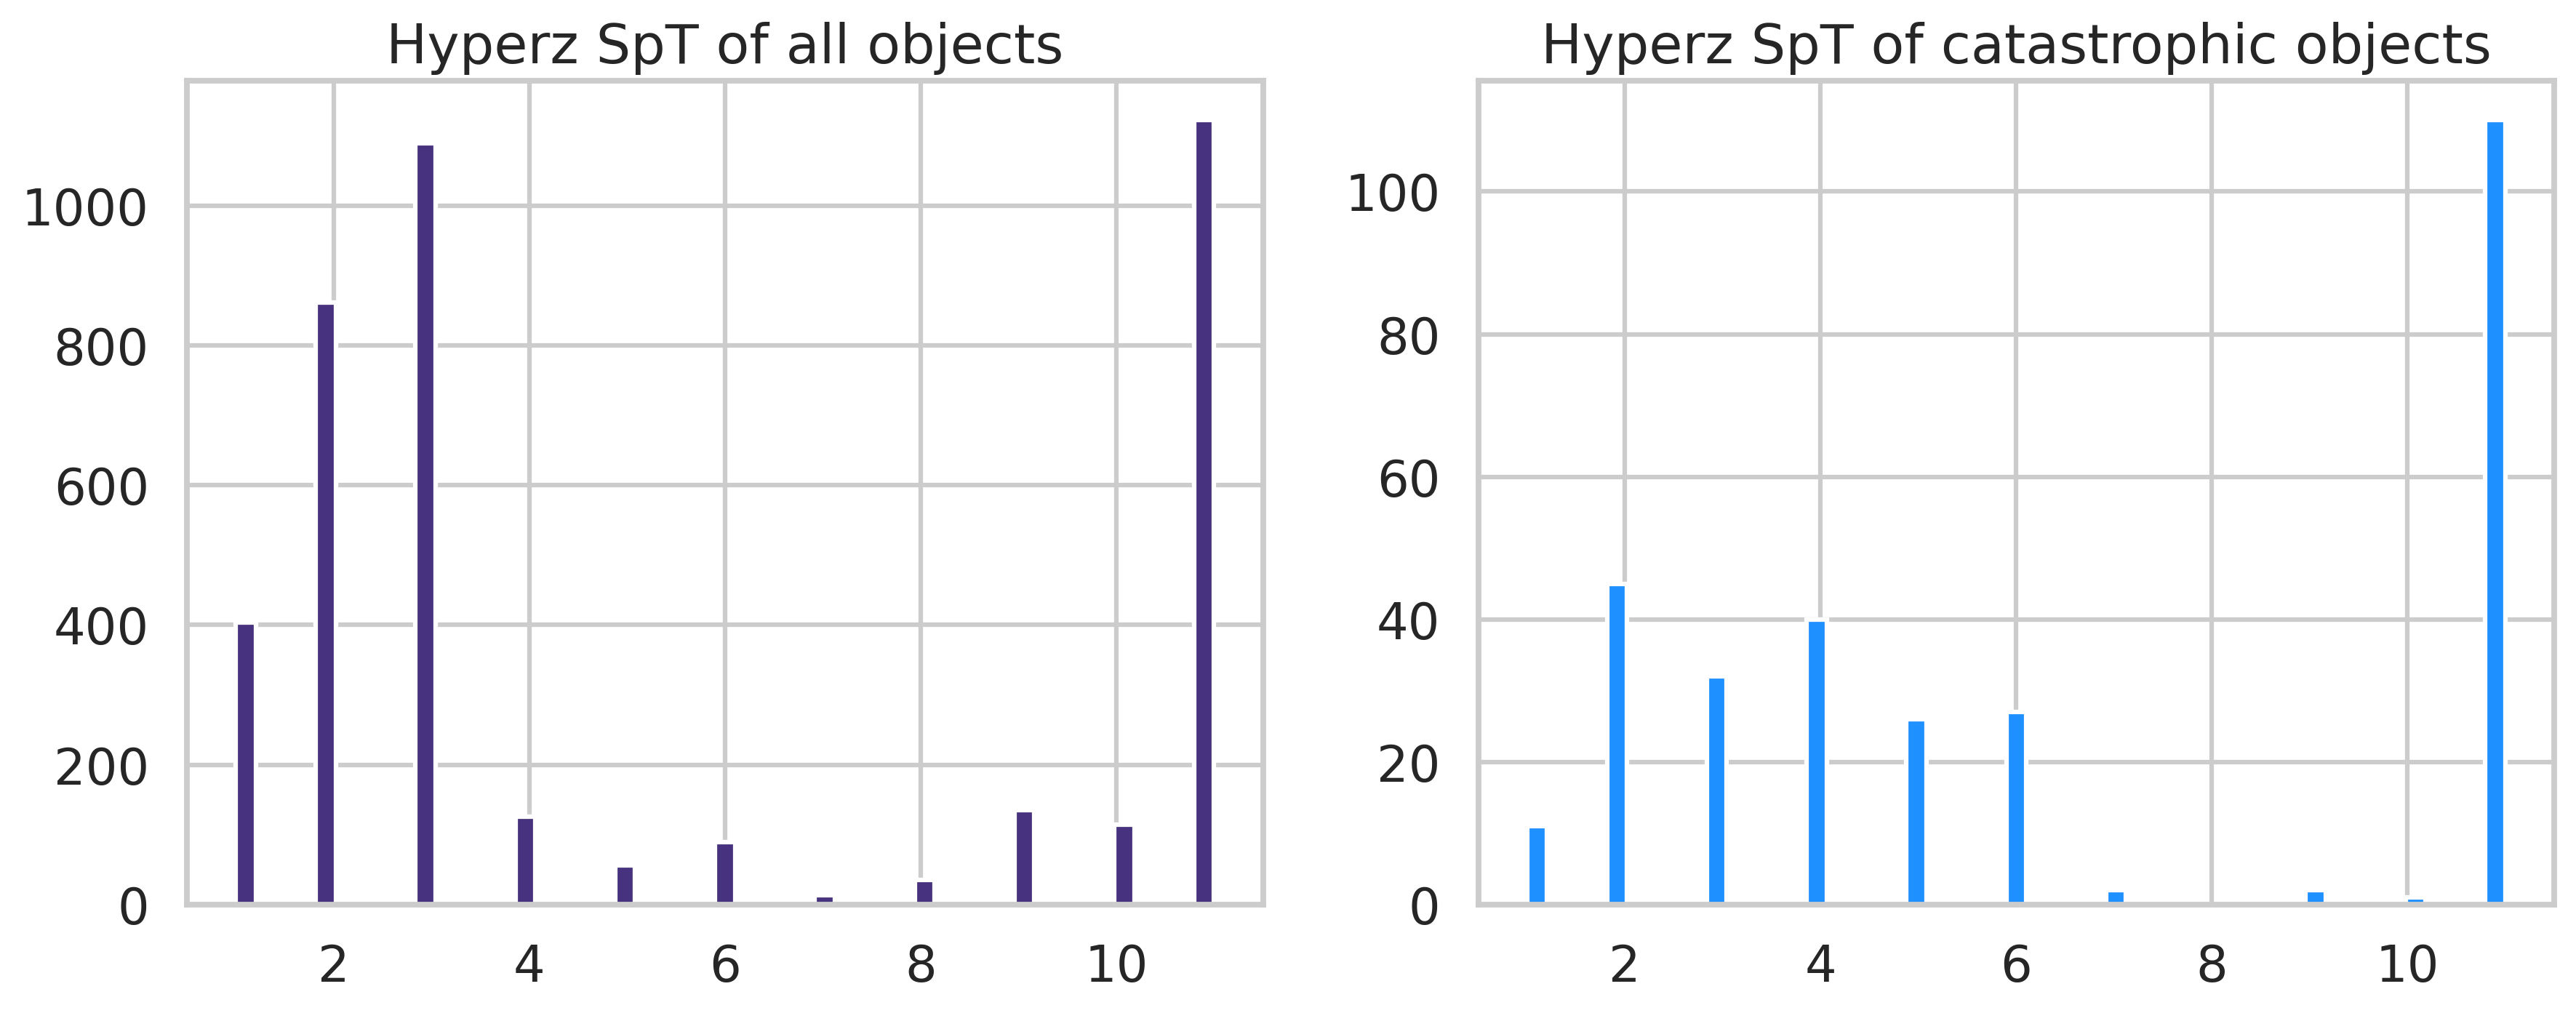

In [145]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title('Hyperz SpT of all objects')
plt.hist(all_zphot[:, 4], bins=np.linspace(1,11))
plt.subplot(122)
plt.title('Hyperz SpT of catastrophic objects')
plt.hist(all_zphot[bad_z_index-1, 4], bins=np.linspace(1,11), color='dodgerblue')

#plt.savefig(fig_prefix + 'spt_comparison.png', dpi=300, transparent=False, format='png')

Are the worst photo-z's a product of SpT 11? (SSP)

In [17]:
SpT_ssp_index = np.argwhere(all_zphot[:, 4]==11)

In [18]:
ssp_diff = observed_mags_df.iloc[SpT_ssp_index[:,0], -2].values-observed_mags_df.iloc[SpT_ssp_index[:,0], -1].values

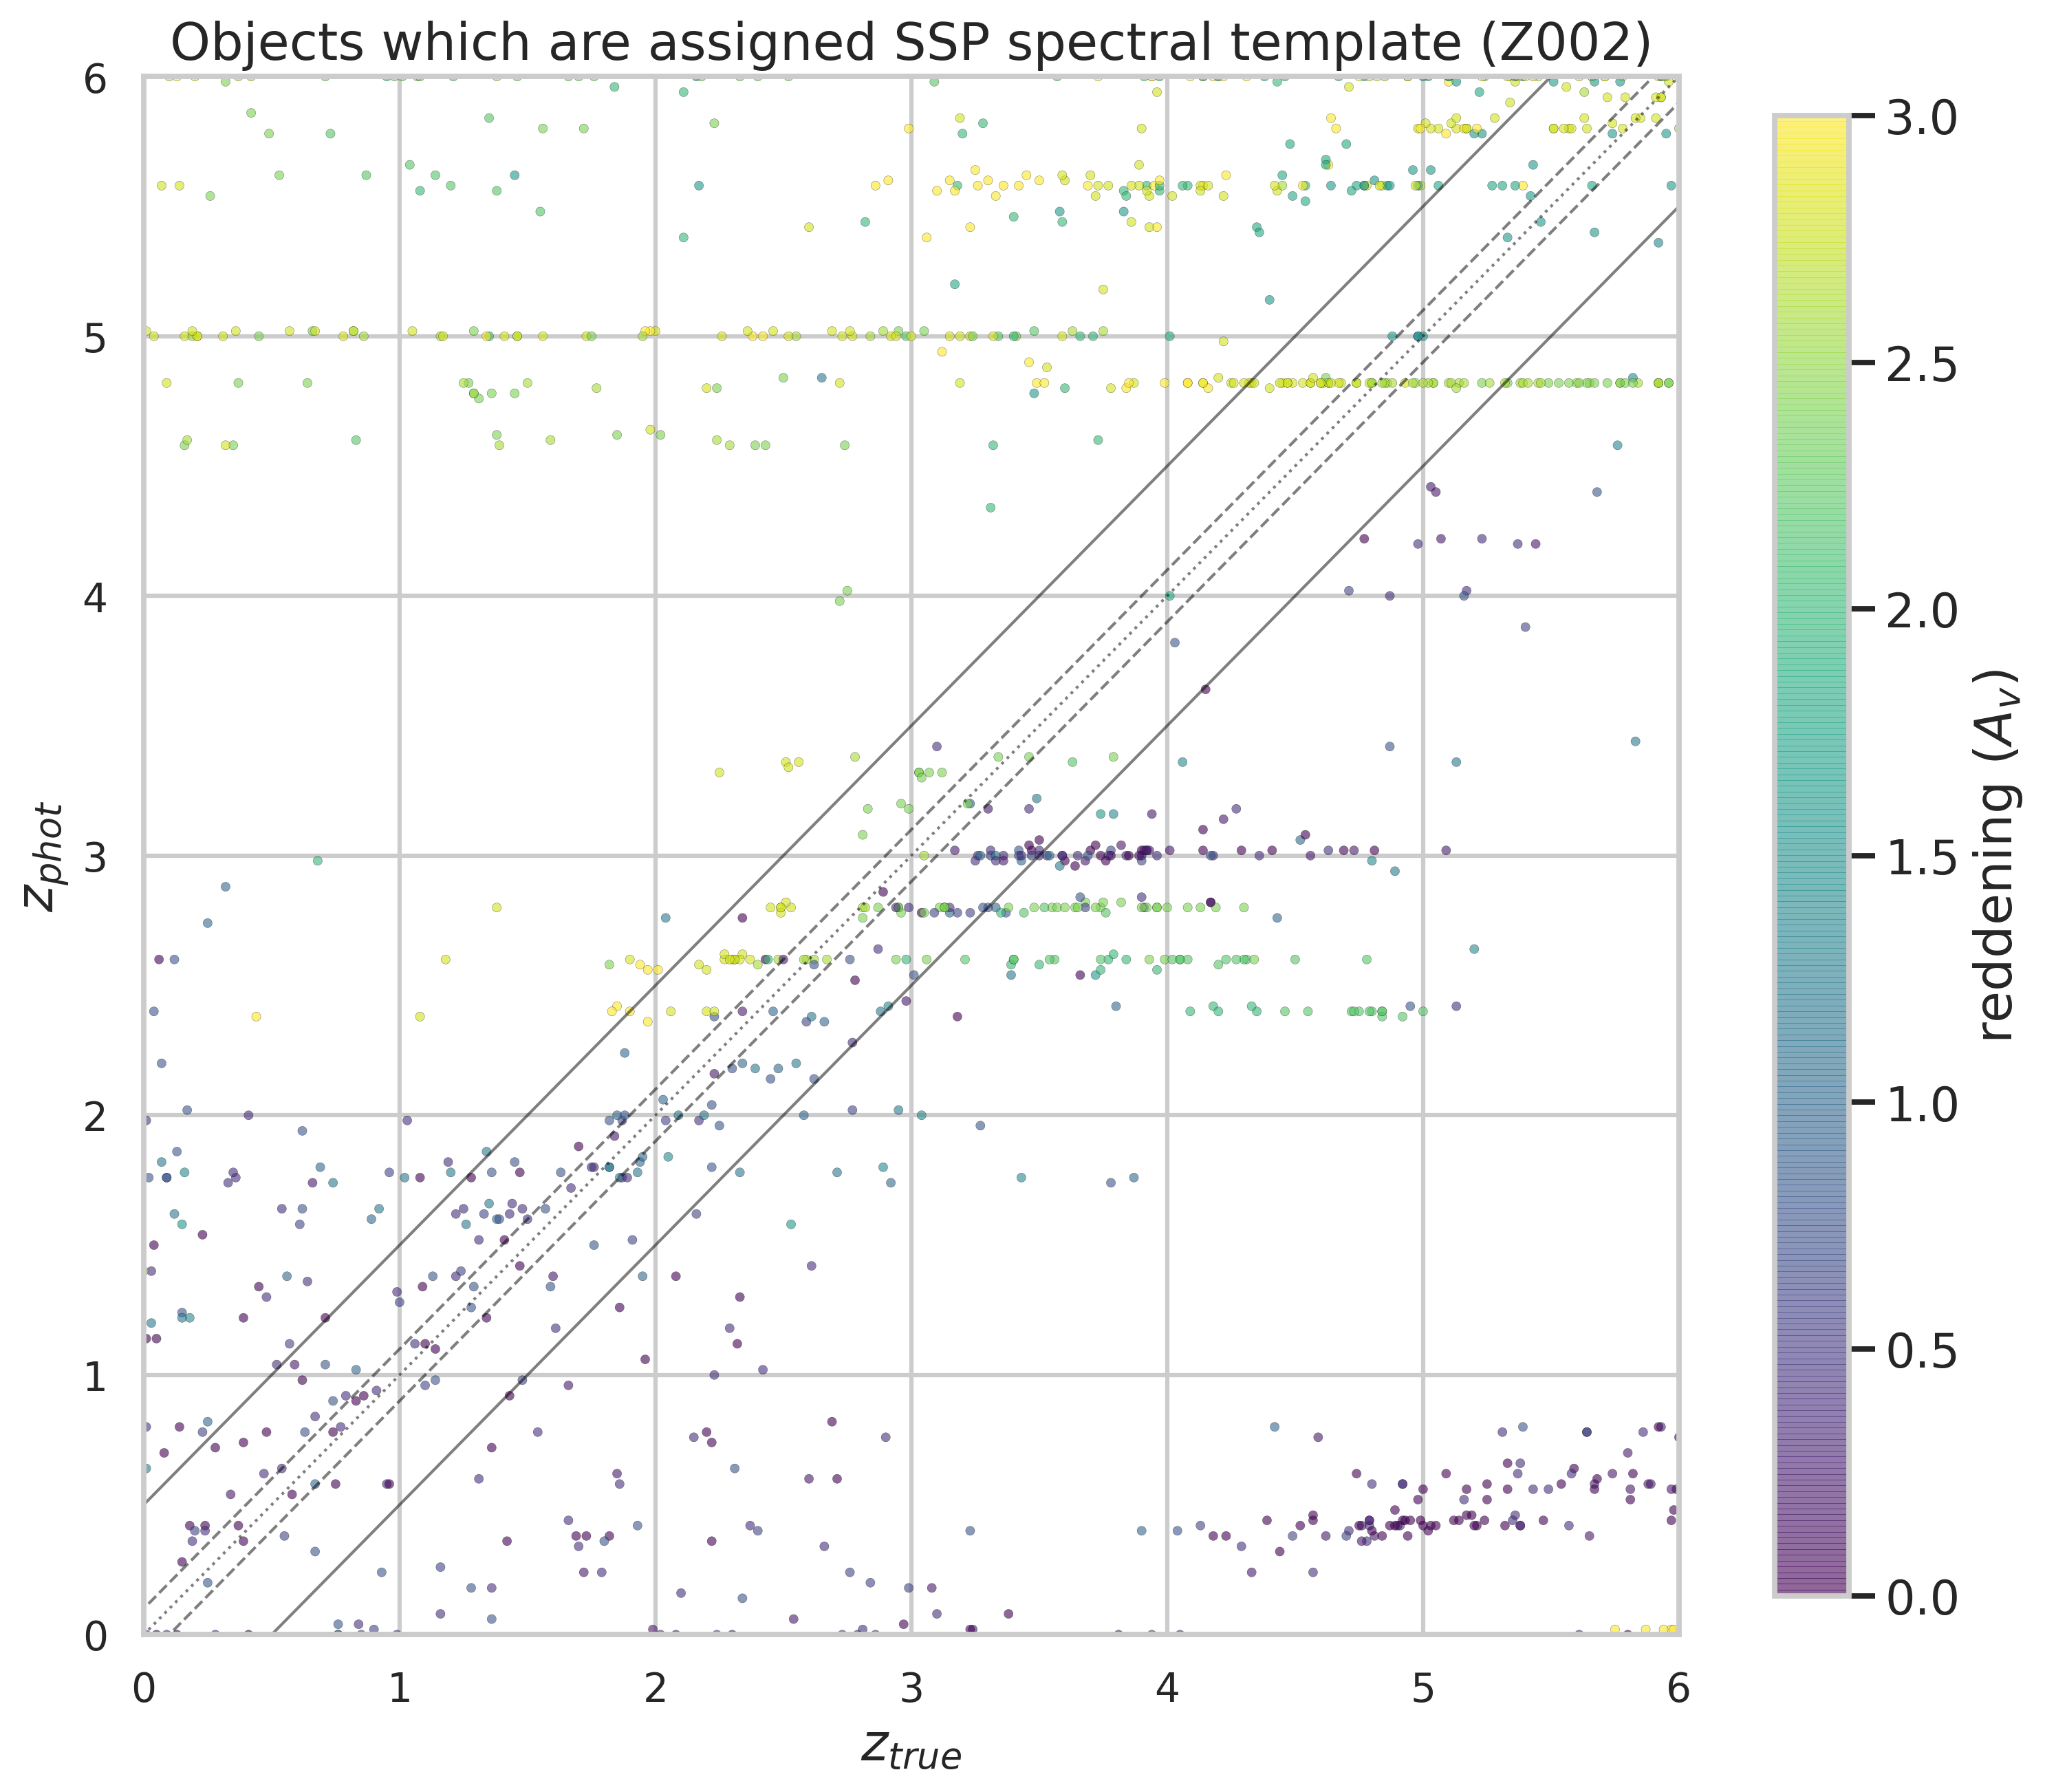

In [19]:
plt.figure(figsize=(12, 10))
plt.title('Objects which are assigned SSP spectral template (Z002)')
plt.plot([-6., 9.5], [-5.5, 10.],'k', alpha=0.5, lw=1)
plt.plot([-6., 9.9], [-5.9, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.], [-6, 10.], ':k', alpha=0.5, ls=':', lw=1)
plt.plot([-6., 10.1], [-6.1, 10.],'k--', alpha=0.5, ls='--', lw=1)
plt.plot([-6., 10.5], [-6.5, 10.],'k', alpha=0.5, lw=1)

plt.scatter(observed_mags_df.iloc[SpT_ssp_index[:,0], -2].values,
            observed_mags_df.iloc[SpT_ssp_index[:,0], -1].values, 
            s=10, alpha=0.6,
            c=model_df.loc[observed_mags_df.iloc[SpT_ssp_index[:,0], -3], 'Av'].values,
            cmap='viridis', edgecolors='k', lw=0.1)
cbar = plt.colorbar(shrink=0.95)
cbar.set_label(r'reddening ($A_v$)')
plt.ylabel((r'$z_{phot}$'))
plt.xlabel((r'$z_{true}$'))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

In [20]:
all_diff = observed_mags_df.iloc[:, -2].values-observed_mags_df.iloc[:, -1].values

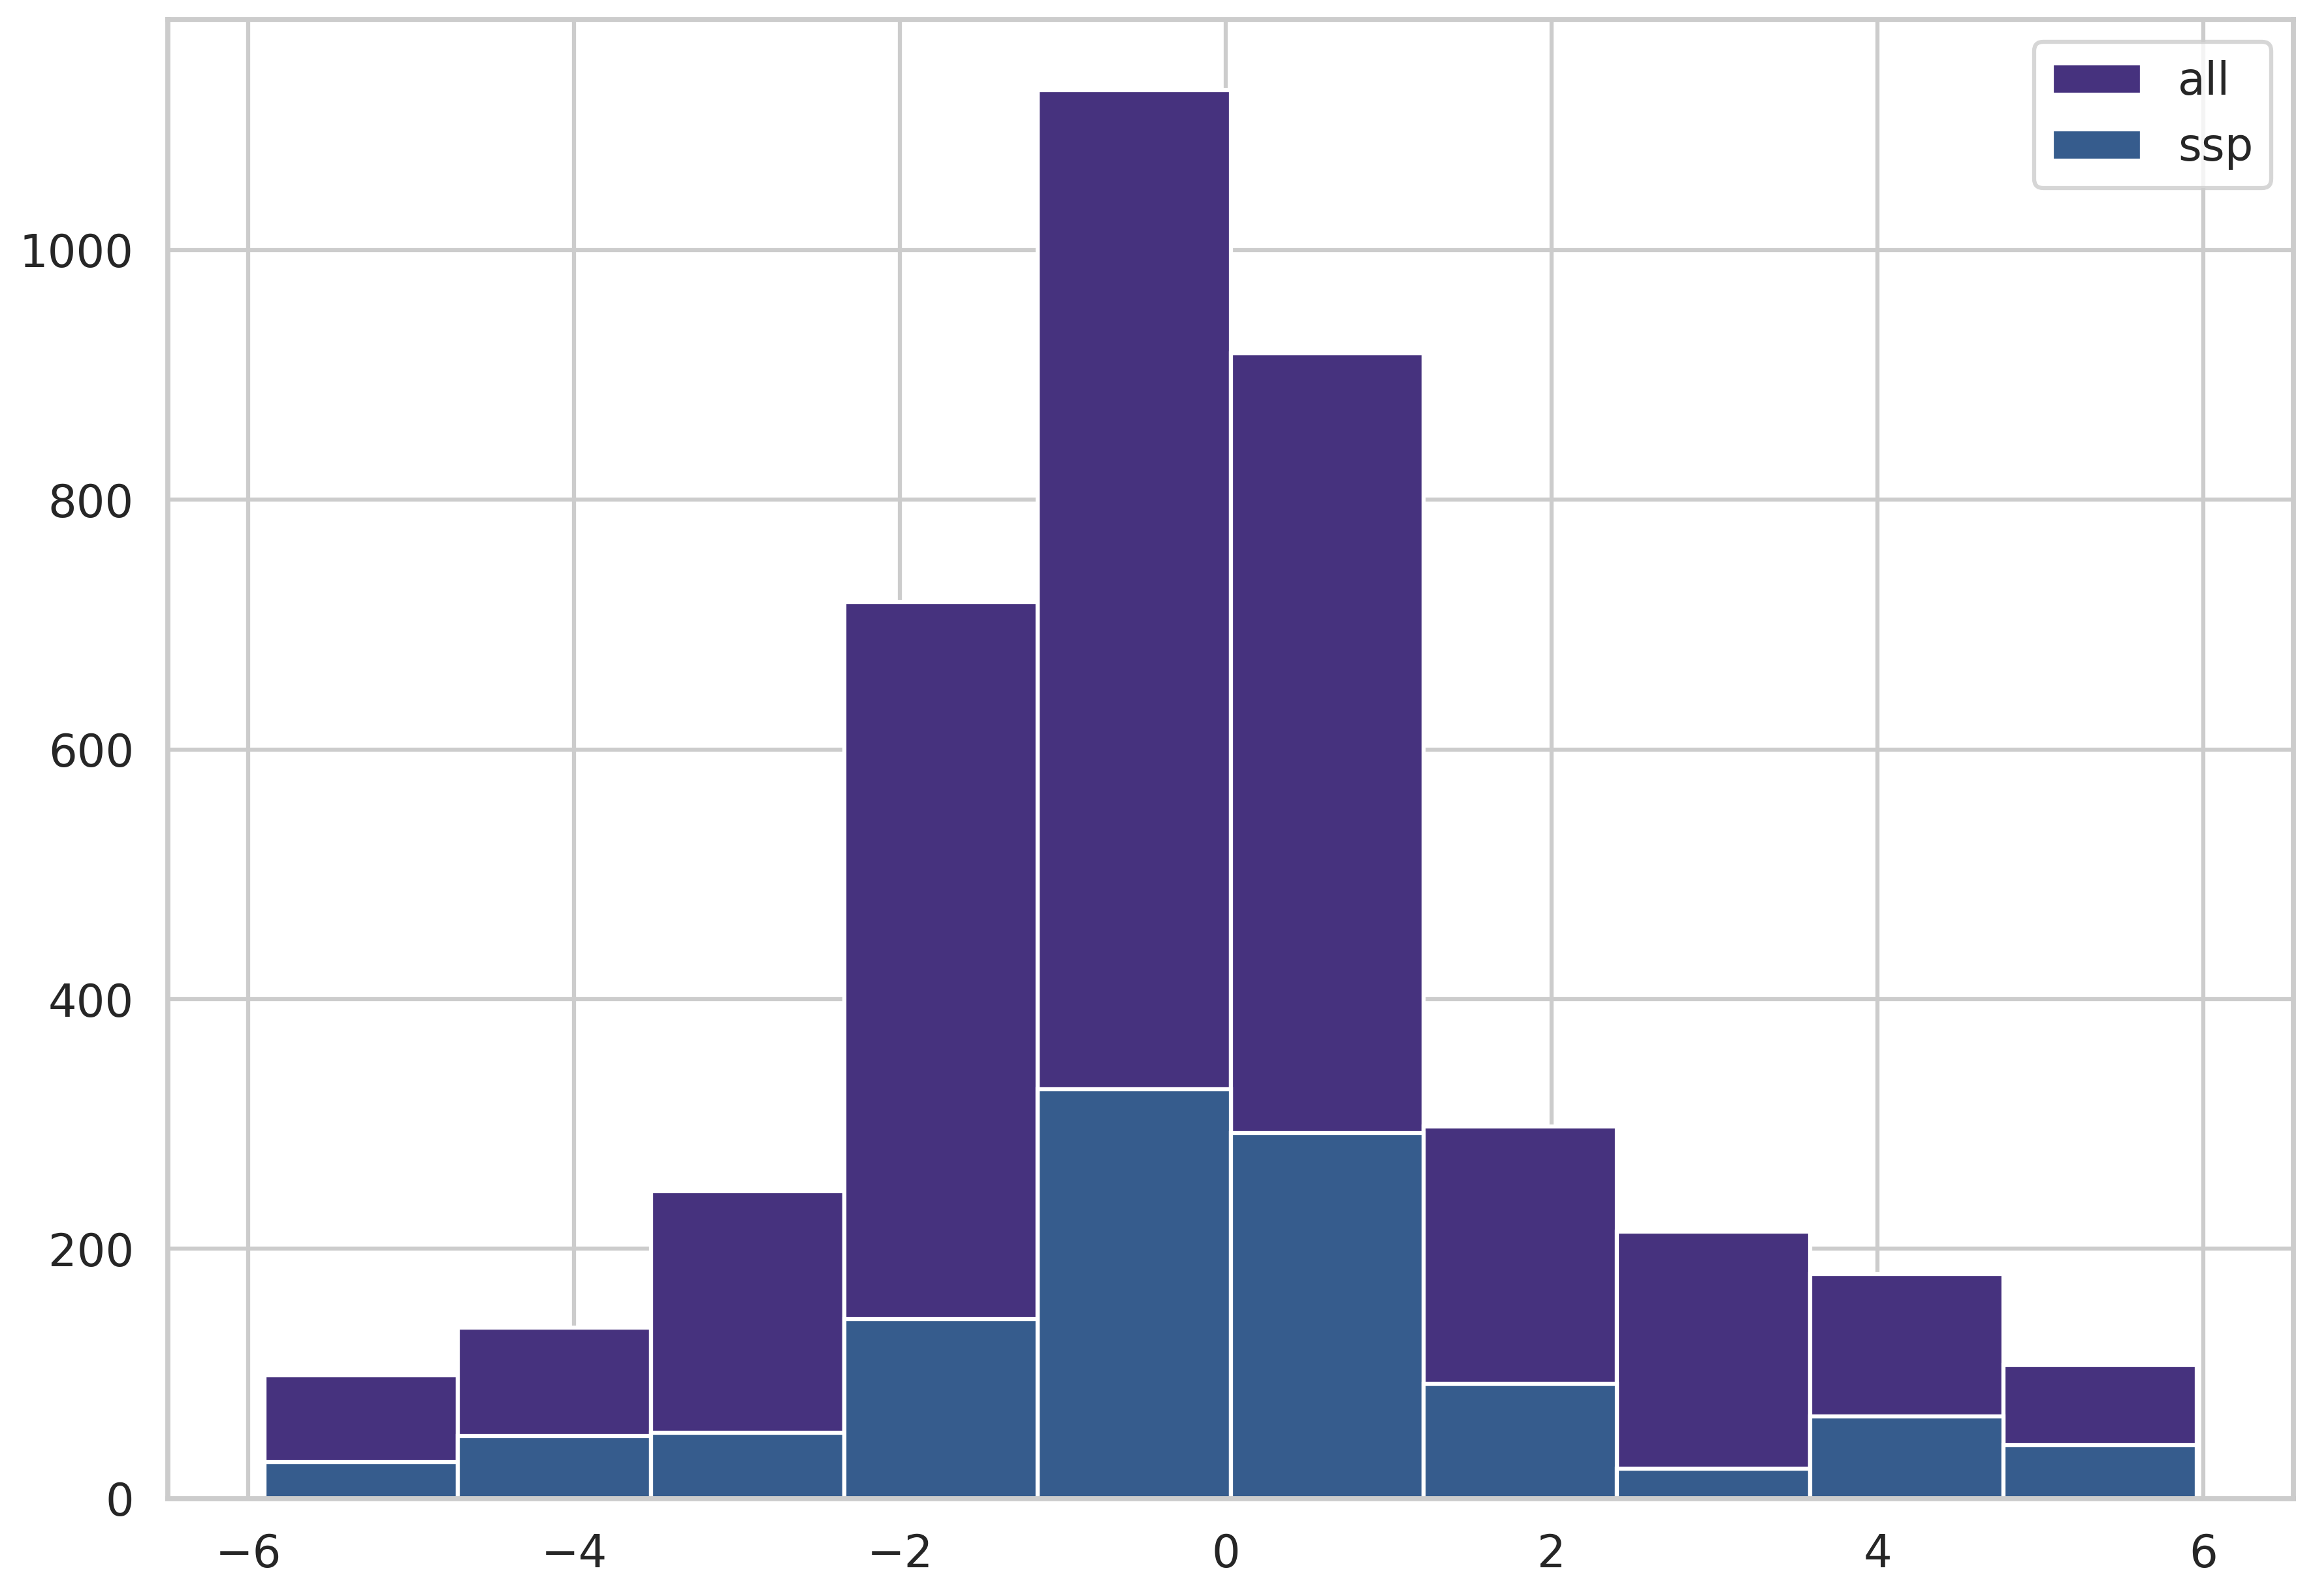

In [21]:
plt.hist(all_diff[np.argwhere(all_diff>-8)],label='all')
plt.hist(ssp_diff, label='ssp')
plt.legend()

this tells us that the objects assigned SpT SSP are not necessarily bad z-phot's

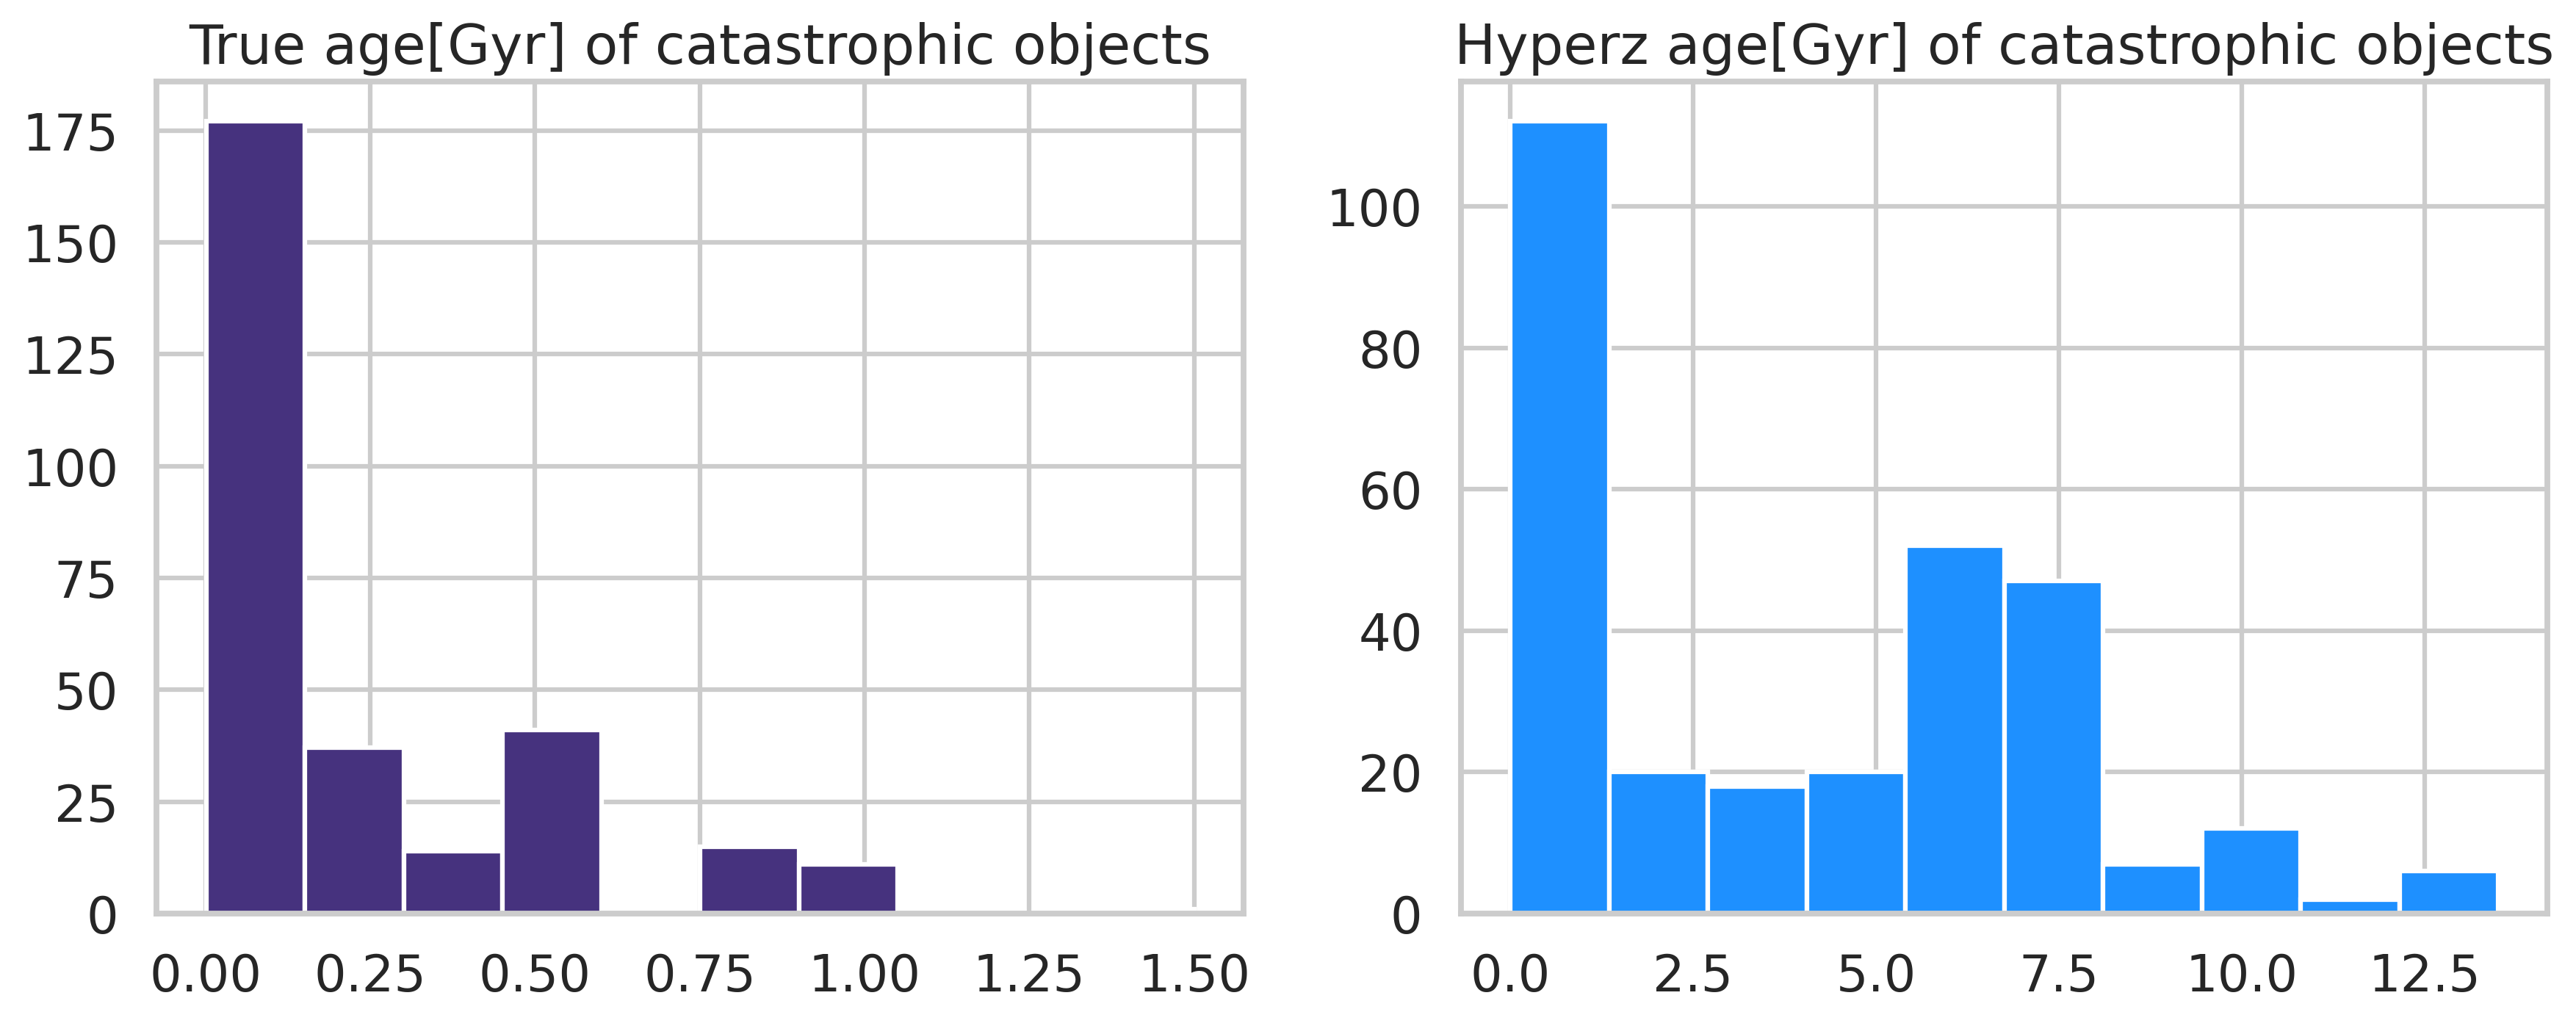

In [146]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title('True age[Gyr] of catastrophic objects')
plt.hist(model_df.loc[observed_mags_df.loc[bad_z_index, 'foreign_index'], 't/Gyr'])
plt.subplot(122)
plt.title('Hyperz age[Gyr] of catastrophic objects')
plt.hist(all_zphot[bad_z_index-1, 6], color='dodgerblue')
plt.show()
#plt.savefig(fig_prefix + 'age_comparison.png', dpi=300, transparent=False, format='png')

This makes sense

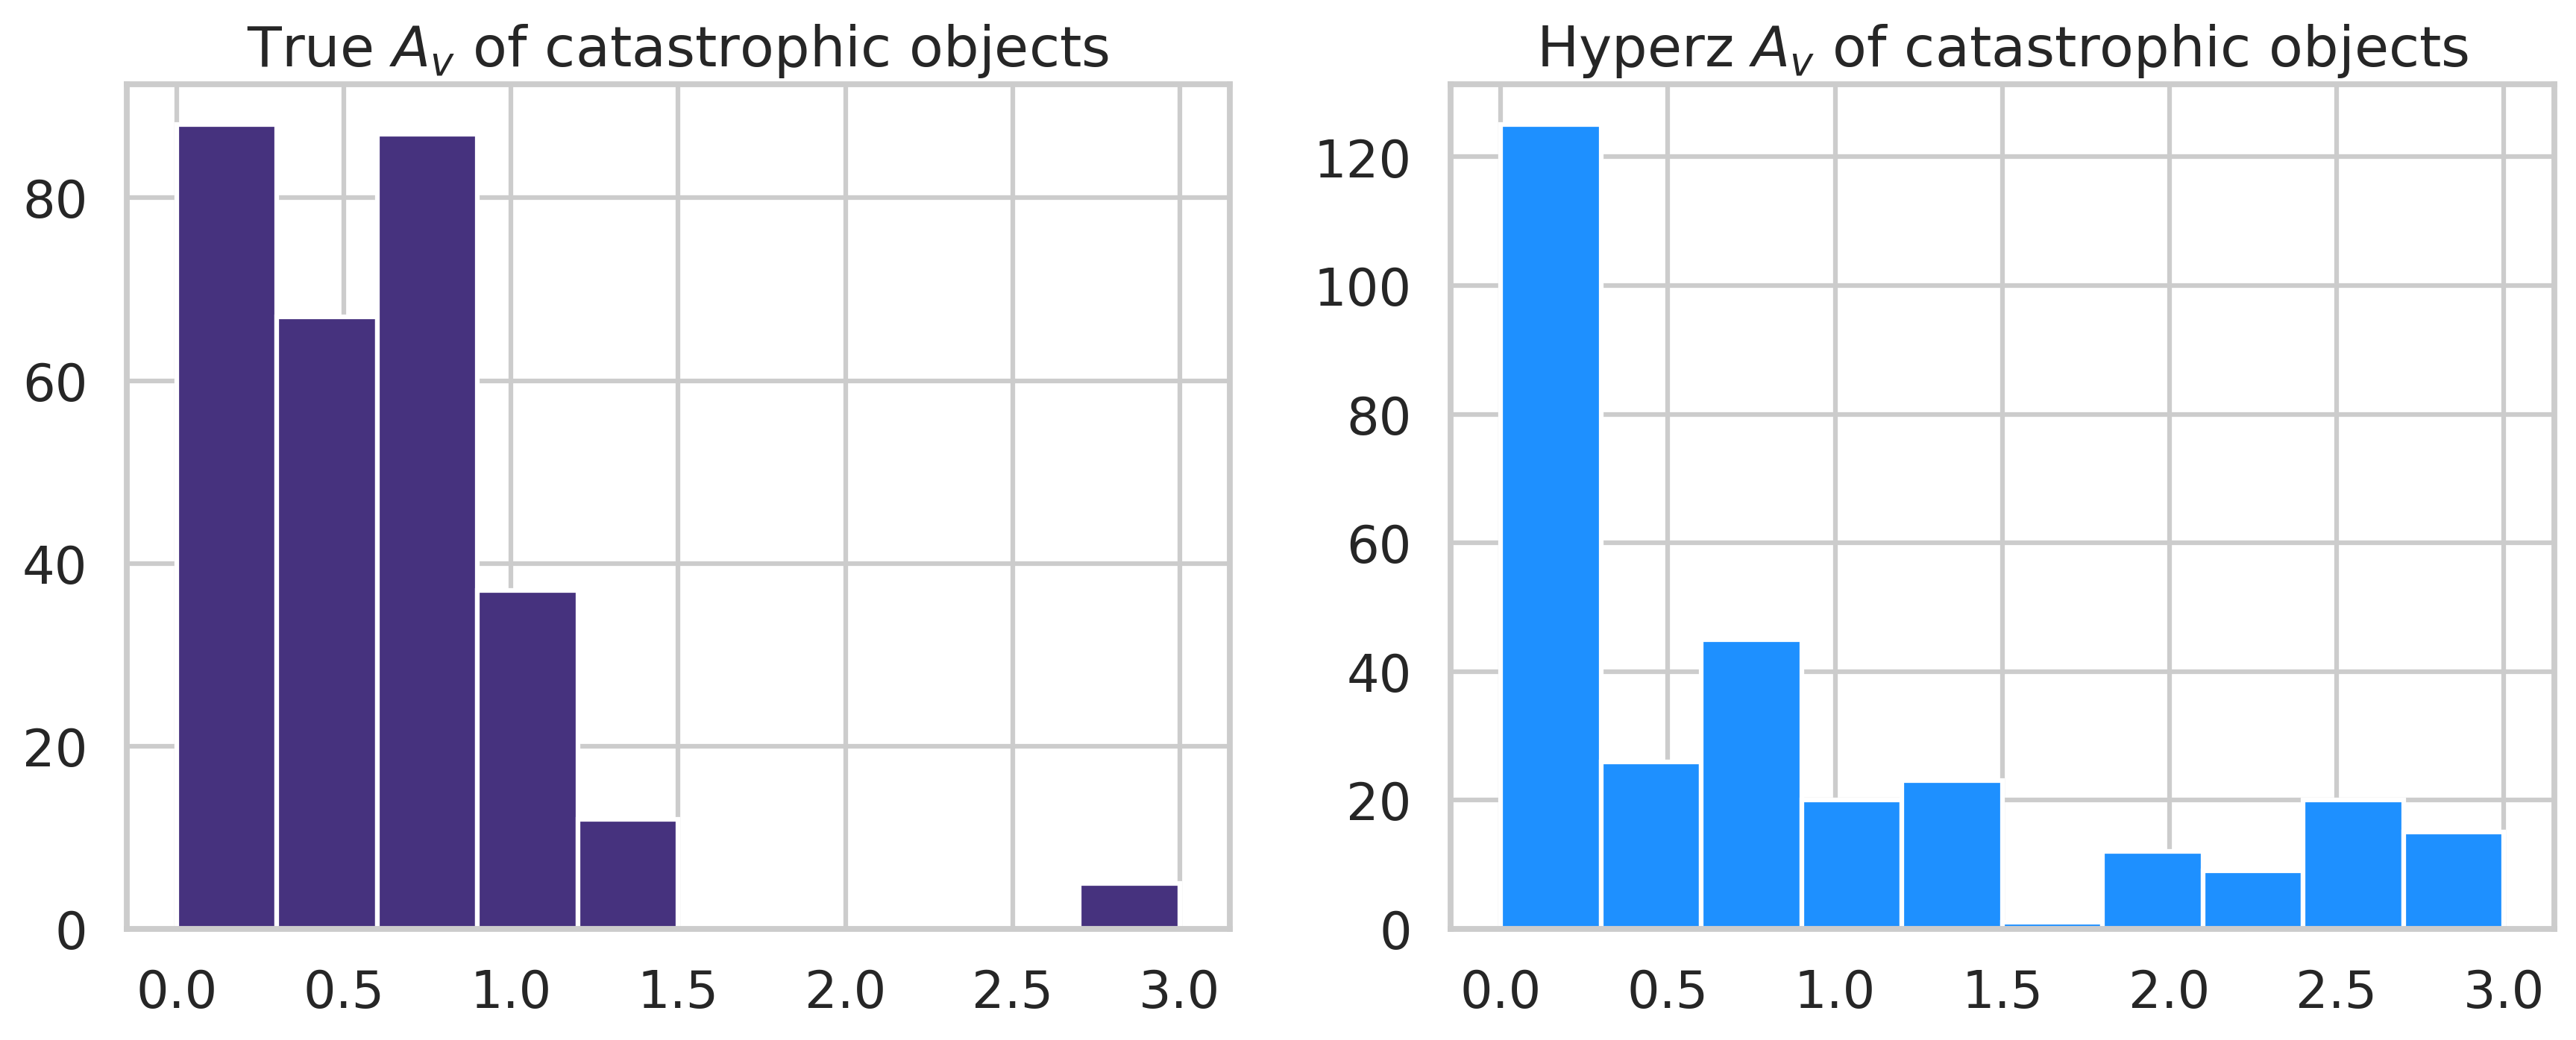

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title('True $A_v$ of catastrophic objects')
plt.hist(model_df.loc[observed_mags_df.loc[bad_z_index, 'foreign_index'], 'Av'])
plt.subplot(122)
plt.title('Hyperz $A_v$ of catastrophic objects')
plt.hist(all_zphot[bad_z_index-1, 7], color='dodgerblue')
plt.show()

### Photometry of a few catastrophic objects

In [24]:
all_obs_sed = np.loadtxt(r'/home/chris/Documents/ZPHOT1.3/src/result_all_4051/result_ugrizVISYJH_4051.obs_sed')
all_temp_sed = np.loadtxt(r'/home/chris/Documents/ZPHOT1.3/src/result_all_4051/result_ugrizVISYJH_4051.temp_sed')

`n     wl_eff     surface   bandpass1  conv_AB  m_corr mlim(Vega) nd
1    3678.791    483.497    400.386    0.656  0.000  22.744     0
2    4838.533   1153.805    965.102   -0.072  0.000  23.052     0
3    6440.406   1387.511    896.239    0.195  0.000  22.805     0
4    7819.968   1384.167    913.051    0.419  0.000  21.841     0
5    9168.834   1272.171    940.504    0.535  0.000  21.525     0
6    7155.421   3290.675   2086.095    0.255  0.000  20.345     0
7   10866.631   2533.358   1580.391    0.701  0.000  19.099     0
8   13686.279   3912.296   2351.518    1.051  0.000  17.449     0
9   17726.499   4897.392   2905.883    1.496  0.000  16.004     0`

In [25]:
wl_eff = [3678.791, 4838.533, 6440.406, 7819.968, 9168.834, 7155.421, 10866.631, 13686.279, 17726.499]

In [26]:
bandpass1 = [400.386, 965.102, 896.239, 913.051, 940.504, 2086.095, 1580.391, 2351.518, 2905.883]

In [27]:
import random

In [133]:
random.seed(4)
bad_selection = random.sample(list(bad_z_index), 8)
bad_selection

[1570, 2001, 587, 2819, 3426, 945, 539, 309]

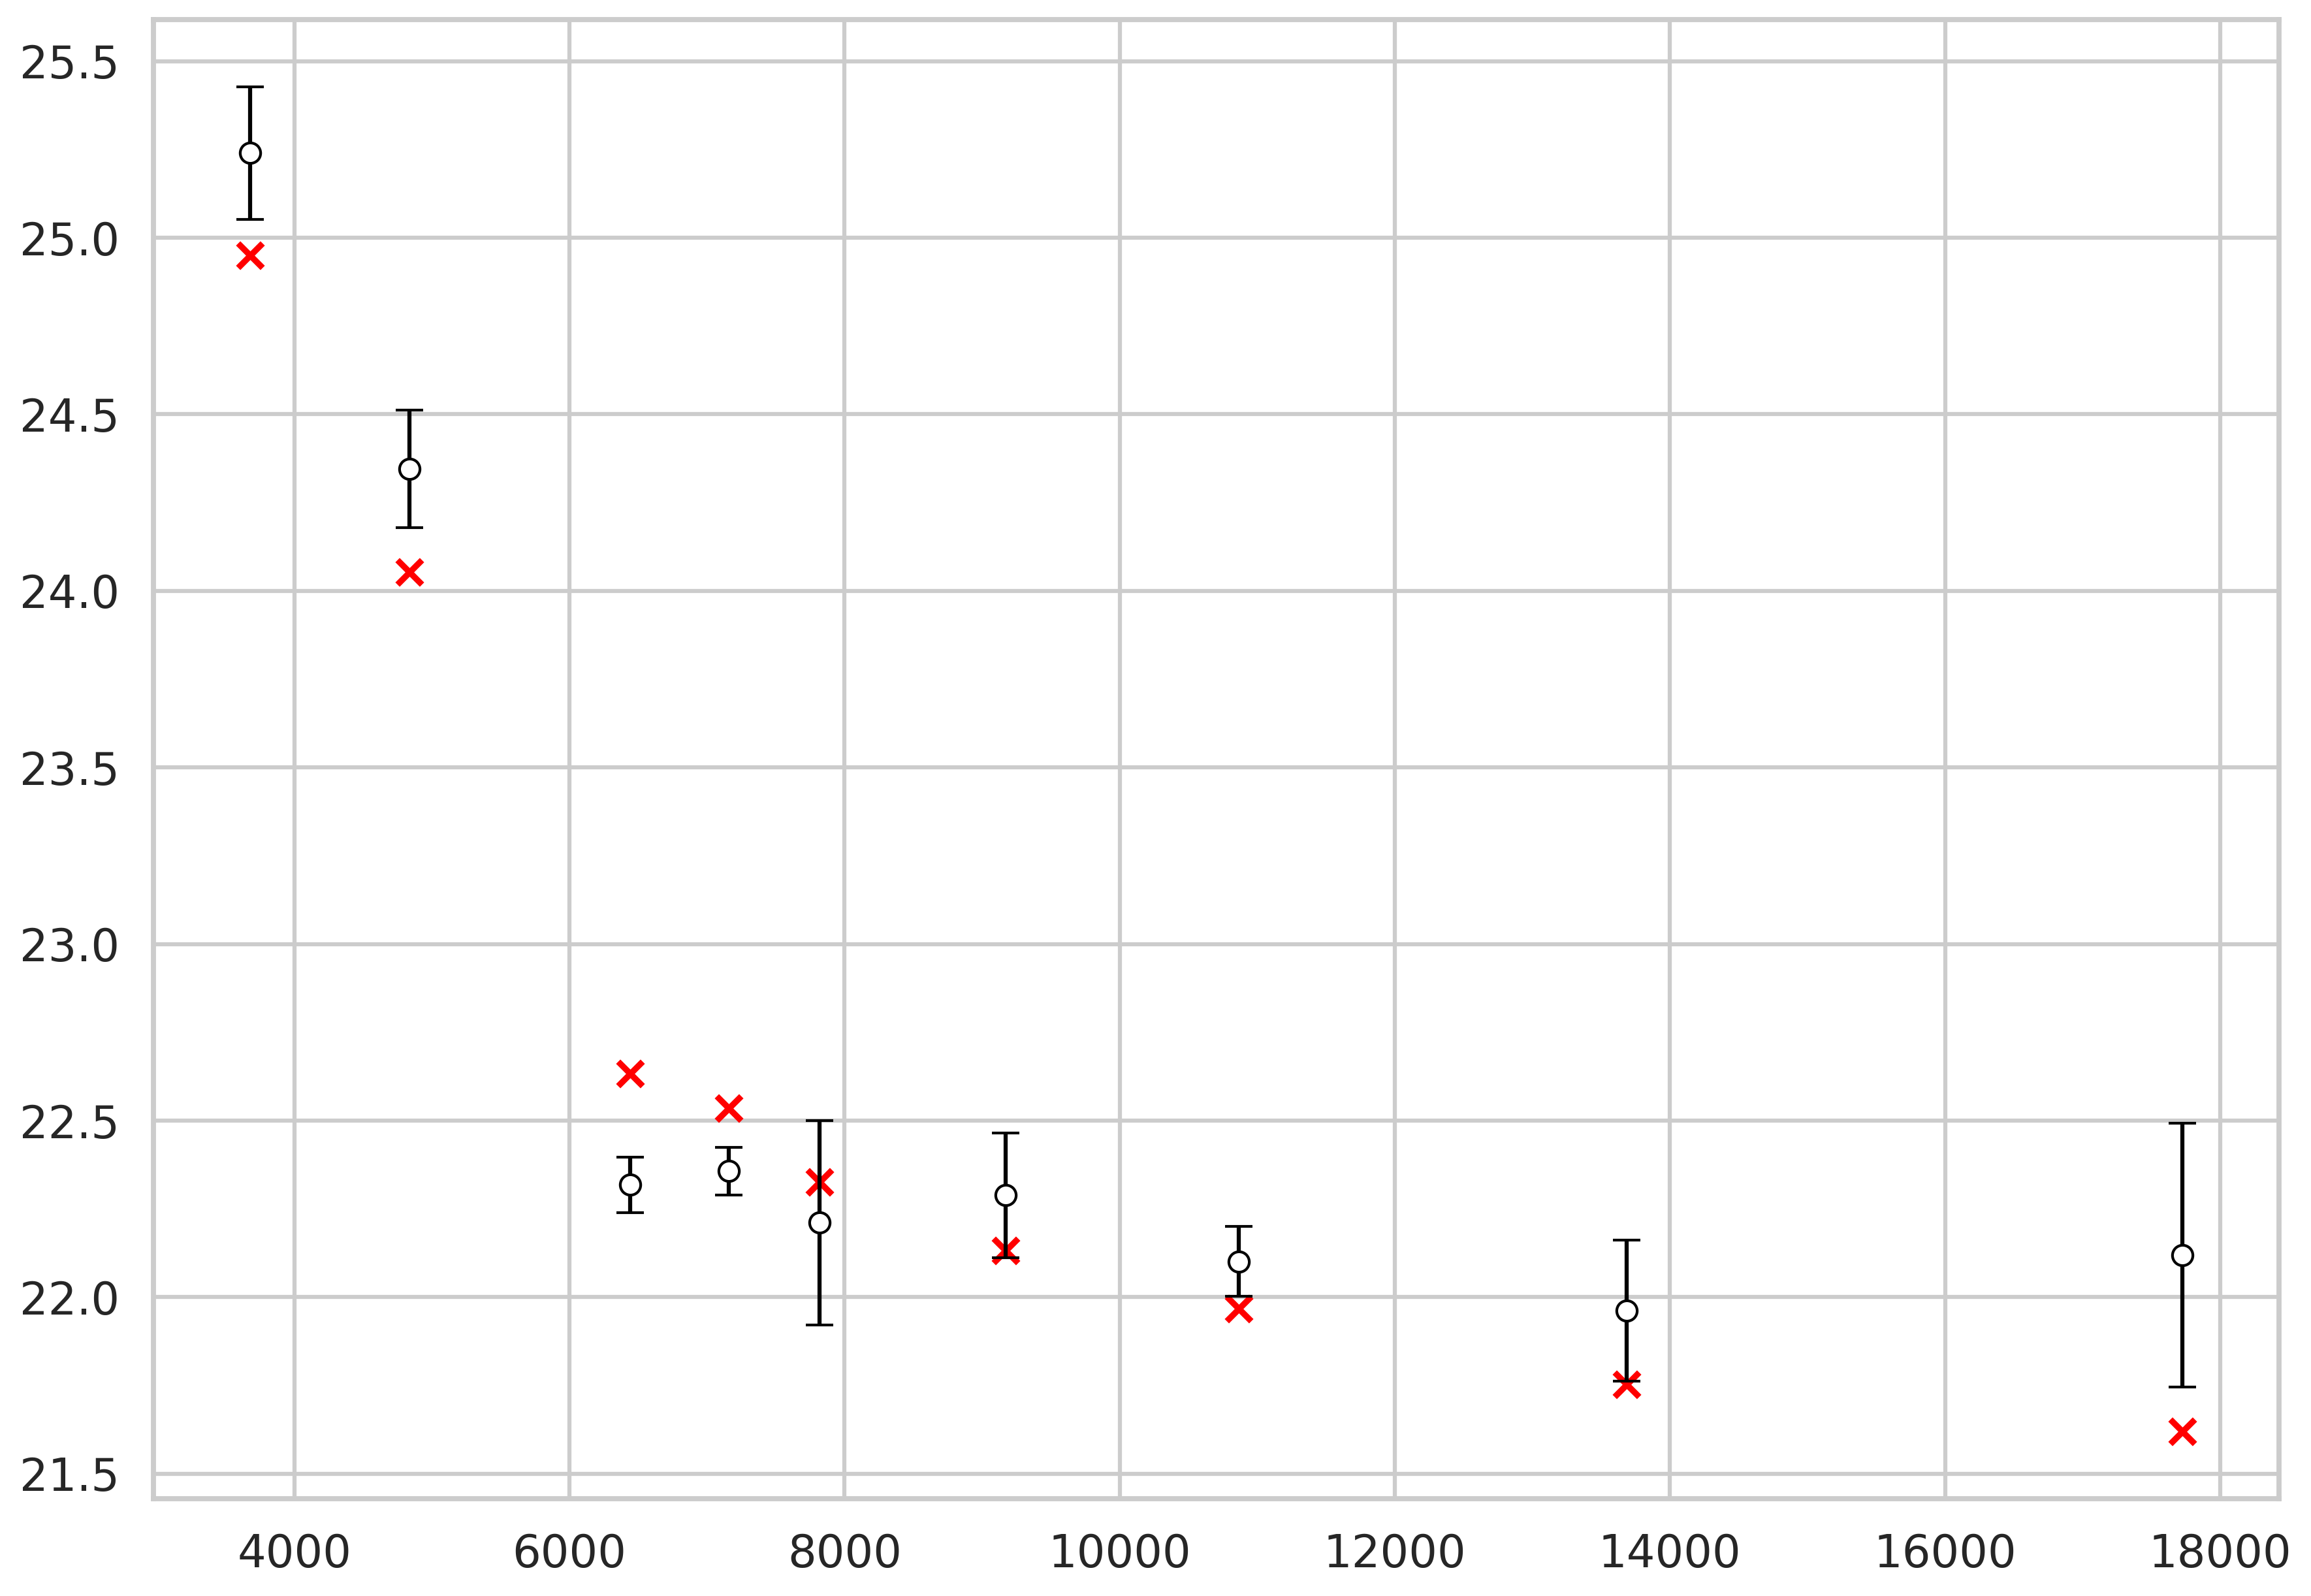

In [97]:
plt.errorbar(wl_eff, all_obs_sed[bad_z_index[1]-1, 1:10], fmt='k.', alpha=1
              , yerr=all_obs_sed[bad_z_index[1]-1, 10:], capsize=5
              , mfc='w', mec='k', ms=15, mew=1, elinewidth=1.5)
    
plt.scatter(wl_eff, all_temp_sed[bad_z_index[1]-1, 1:], c='r', marker='x')

In [134]:
metadata = (' $z_{true}$ = %.2f \n $z_{phot}$ = %.2f \n $\chi^2$ = %.3f \n age$_{true}$ = %.2f [Gyr] \n age$_{phot}$ = %.4f [Gyr] ' % 
            (observed_mags_df.loc[bad_selection[0], 'spec_z'],
             observed_mags_df.loc[bad_selection[0], 'allphot_z'],
             all_zphot[bad_selection[0]-1, 2],
             model_df.loc[observed_mags_df.loc[bad_selection[0], 'foreign_index'], 't/Gyr'],
             all_zphot[bad_selection[0]-1, 6]
            ) 
           )
print(metadata)

 $z_{true}$ = 5.17 
 $z_{phot}$ = 0.80 
 $\chi^2$ = 11.412 
 age$_{true}$ = 0.02 [Gyr] 
 age$_{phot}$ = 7.5000 [Gyr] 


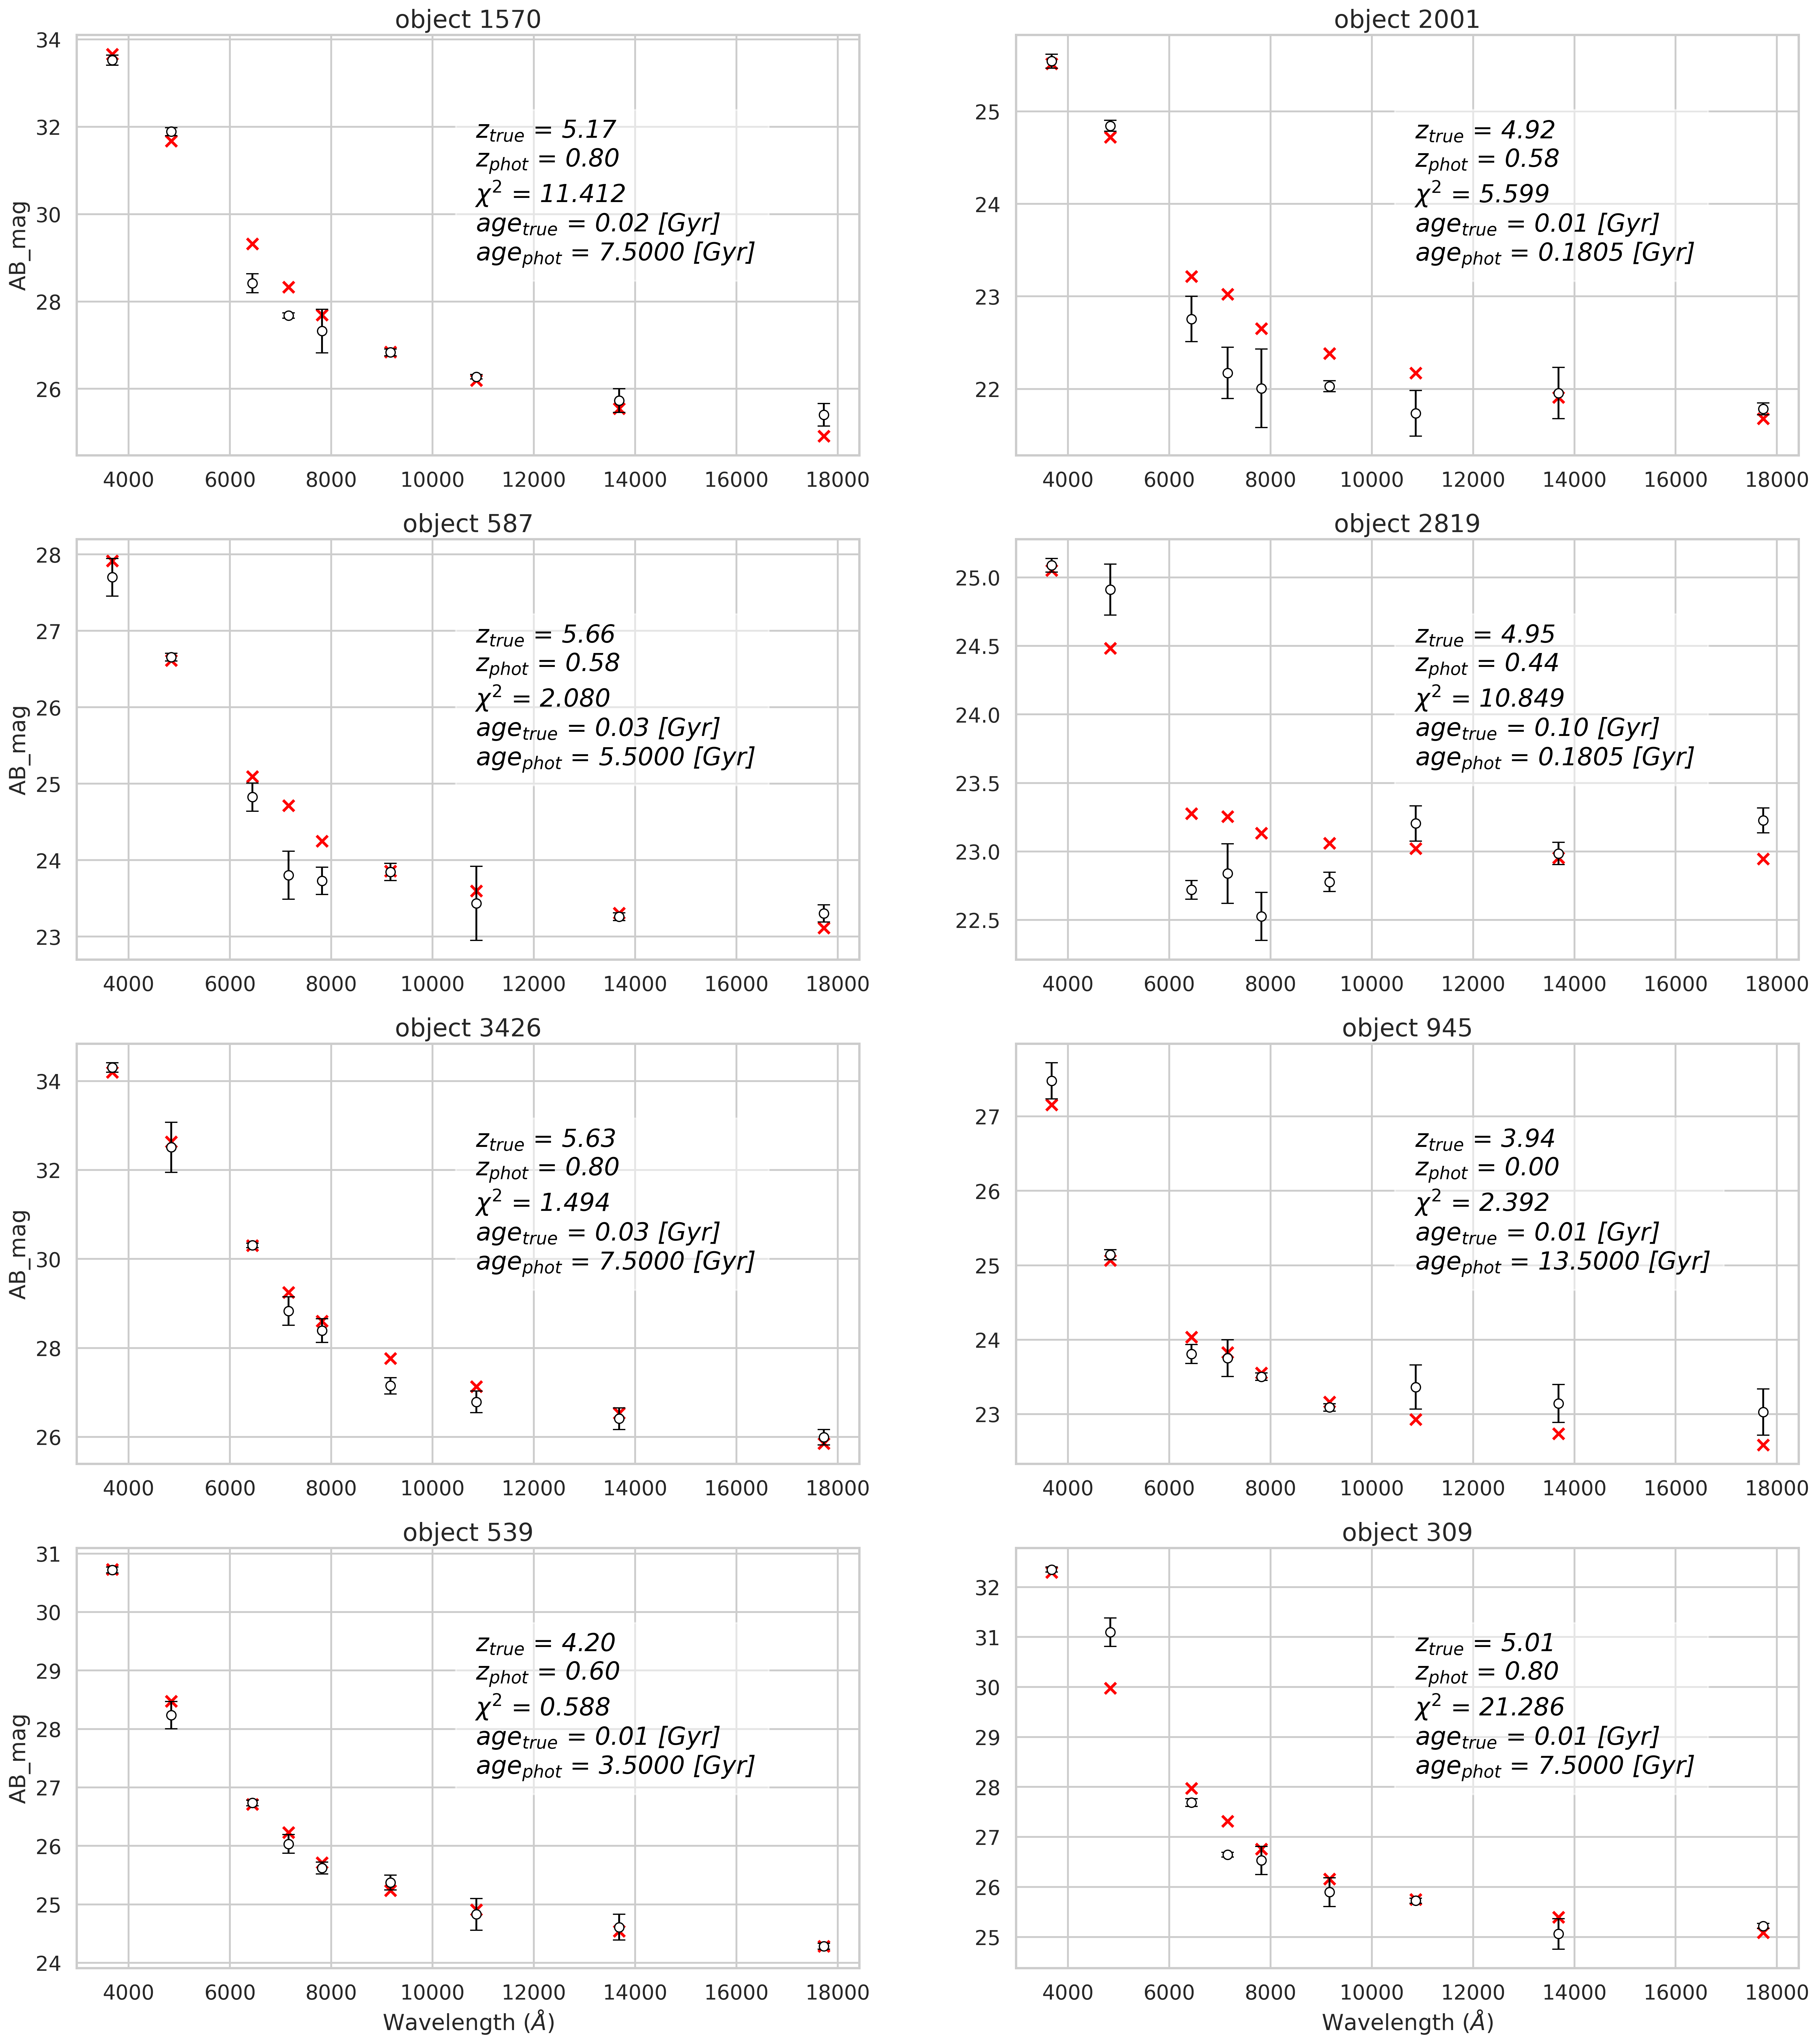

In [147]:
fig = plt.figure(figsize=(25, 30))
for i in range(0, 8):
    
    ax = fig.add_subplot(421+i)
    fig.subplots_adjust(top=0.85)

    # Set titles for the figure and the subplot respectively
    ax.set_title(('object ' + str(bad_selection[i])), fontsize=20)
    metadata = (' $z_{true}$ = %.2f \n $z_{phot}$ = %.2f \n $\chi^2$ = %.3f \n age$_{true}$ = %.2f [Gyr] \n age$_{phot}$ = %.4f [Gyr] ' % 
                (observed_mags_df.loc[bad_selection[i], 'spec_z'],
                 observed_mags_df.loc[bad_selection[i], 'allphot_z'],
                 all_zphot[bad_selection[i]-1, 2],
                 model_df.loc[observed_mags_df.loc[bad_selection[i], 'foreign_index'], 't/Gyr'],
                 all_zphot[bad_selection[i]-1, 6]
                ) 
               )
    if i >5: ax.set_xlabel(r'Wavelength ($\AA$)')
    if i%2 == 0: ax.set_ylabel('AB_mag')

    # Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
    #ax.axis([0, 10, 0, 10])

    ax.text(0.5, 0.8, s=metadata, style='italic',
            bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 10},
            verticalalignment='top', horizontalalignment='left',
            transform=ax.transAxes,
            color='k', fontsize=20)

    ax.errorbar(wl_eff, all_obs_sed[bad_selection[i]-1, 1:10], fmt='k.', alpha=1
                , yerr= all_obs_sed[bad_selection[i]-1, 10:], capsize=5
                , mfc='w', mec='k', ms=15, mew=1, elinewidth=1.5)

    ax.scatter(wl_eff, all_temp_sed[bad_selection[i]-1, 1:], c='r', marker='x')


plt.show()
#plt.savefig(fig_prefix + 'obs_vs_temp.png', dpi=300, transparent=False, format='png')